---
# Análise Exploratória de Dados das Lojas Rossmann
---

A rede de lojas [Rossmann](https://www.rossmann.de/de/) é uma cadeia de drogarias e perfumarias de origem alemã. Fundada em 1972, a Rossmann opera em vários países europeus, incluindo Alemanha, Polônia, Hungria, República Tcheca, Albânia, entre outros. A empresa é conhecida por oferecer uma ampla gama de produtos, incluindo cosméticos, produtos de higiene pessoal, artigos de farmácia, alimentos e outros itens de consumo diário.


A Rossmann se destaca pela combinação de preços acessíveis e um portfólio diversificado de marcas, tanto próprias quanto de grandes fabricantes. A loja tem um forte foco em produtos ecológicos e orgânicos, além de iniciativas voltadas para a sustentabilidade, como a redução de plástico e o uso de energia renovável.

<center><img alt="ROSSMANN" width="50%" src="https://geolytix.ghost.io/content/images/2023/03/IMG_20230303_133012474.jpg"></center>


Com o intuito de ampliar a compreensão sobre a empresa, este projeto realizará a análise de dados públicos sobre as vendas nas lojas da Rossmann. O foco dessa análise será responder a possíveis questionamentos dos tomadores de decisão da empresa e gerar insights a partir dos dados.

---
## Objetivo do Estudo

Realizar uma análise exploratória dos dados públicos de vendas das lojas Rossmann, com foco em responder perguntas de negócio e gerar valor a partir dos dados.

---

# 1.0 OBTENÇÃO DOS DADOS E IMPORTAÇÃO DE BIBLIOTECAS 

Todos os dados usados aqui foram obtidos a partir de um dataset no [***Kaggle***](https://www.kaggle.com/), disponibilizado [aqui!](https://www.kaggle.com/c/rossmann-store-sales/overview).

O ***Kaggle*** é uma plataforma online voltada para a comunidade de ciência de dados e aprendizado de máquina. Fundada em 2010, o Kaggle permite que usuários de todos os níveis de habilidade participem de competições, acessem datasets gratuitos, pratiquem e desenvolvam habilidades em ciência de dados, além de colaborar com outros membros da comunidade.

In [1]:
# Bibliotecas para a Manipulação de Dados
import pandas  as pd
import numpy   as np

# Bibliotecas para EDA
import seaborn as sns
from matplotlib import pyplot as plt

#Bibliotecas auxiliares
from scipy import stats  as ss
import math
import inflection
import datetime
import random
import warnings
from IPython.display import Image
from tabulate        import tabulate
from IPython.display import display, HTML

## 1.1 FUNÇÕES AUXILIARES 

In [2]:
# Essa função defini o tamnho da imgaem gerada pela biblioteca SeaBorn 
sns.set(rc = {'figure.figsize':(15,15)})

In [3]:
# Esta função calcula o Cramér's V, um método para encontrar a correlação entre variáveis categóricas.
def cramer_v(x, y):

    cm = pd.crosstab(x, y).values

    n = cm.sum()

    k,r = cm.shape
    
    chi2 = ss.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k-1) * (r-1) / (n -1) )
    
    kcorr = k - (k-1)**2 / (n-1) 
    
    rcorr = r - (r-1)**2 / (n-1) 
    
    
    return np.sqrt ( ( chi2corr / n) / ( min (kcorr-1 ,rcorr-1 ) ) )

In [4]:
# Função para definir alguns elementos visuais da IDE que estou utilizando nesse projeto o Jupyter Notebook.
def jupyter_settings():
    %matplotlib inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    # configura o pandas para quantidade de casas decimeis
    pd.set_option('display.float_format', lambda x: '%.4f' % x)

    sns.set()
jupyter_settings()

## 1.2 CARREGANDO OS DADOS

Os dados estão em arquivos CSV diferentes. Decidi juntá-los, já que todas as variáveis presentes nos dois arquivos são importantes para uma análise correta e fidedigna.

In [5]:
# Carregando os dados 
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

#Merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how= 'left', on = 'Store')

Data fields - Legandas (Dísponivel na pagína kaggle do dataset)

 A maioria dos campos é autoexplicativa. As seguintes são descrições para aqueles que não são.

- Id - an Id that represents a (Store, Date) duple within the test set
- Store - a unique Id for each store
- Sales - the turnover for any given day (this is what you are predicting)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# 2.0 DESCRIÇÃO DE DADOS

In [6]:
# A cada etapa da análise irei fazer um cópia do dataset, por motivos de segurança.
df1 = df_raw.copy()

## 2.1 RENOMEAÇÃO DAS COLUNAS

In [7]:
# Coloquei todas os nomes das colunas em um mesmo formato

cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map( snakecase, cols_old))

df1.columns = cols_new

##  2.2 DIMENSÃO DOS DADOS

In [8]:
# Descobrindo a quantidade de linhas e colunas presente nesse dataset 
datad1 = df1.shape[0]
datad2 = df1.shape[1]

print (f'Número de Linhas: {datad1} ')
print (f'Número de Colunas: {datad2} ')

Número de Linhas: 1017209 
Número de Colunas: 18 


## 2.3 TIPOS DE VARIÁVEIS 

A conferência dos tipos das variáveis em um dataset é fundamental para garantir a correta análise dos dados. Nesse sentido, é importante observar se os tipos estão coerentes com as representações das variáveis. Usei o método d.types.

In [9]:
# Transformei a coluna 'date' no tipo datetume64[ns], ideal para representar datas
df1 ['date'] = pd.to_datetime (df1['date'])

# Utilizei o método dtypes para verificar o tipo de várivel de cada coluna do dataset
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 2.4 CHECAGEM DE NA

**Verificação de Valores Ausentes**

Verificar os dados ausentes em um conjunto de dados é fundamental para garantir a integridade e a confiabilidade das análises.

In [10]:
# Verifiquei os valores ausentes presentes no dataset
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

##  2.5 PREENCHIMENTO DE VALORES AUSENTES

Preencher valores ausentes em um dataset é essencial para garantir a integridade dos dados, evitar vieses e preservar informações valiosas. Isso facilita análises mais precisas e visualizações completas, melhora a qualidade geral dos dados e evita problemas em sistemas de produção. Além disso, preparar o dataset com valores preenchidos economiza tempo e esforço para futuras análises, assegurando que o dataset esteja pronto para usos subsequentes sem necessidade de retrabalho.

Neste projeto, decidi lidar com os valores ausentes preenchendo-os, pois a quantidade de dados ausentes é pequena e há dados relacionados que podem ser utilizados para preenchê-los.


In [11]:
# Nessa parte eu tratei todas as colunas que tinham a presença de NAs

# competition_distance              
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)   

# competition_open_since_month    
df1['competition_open_since_month'] = df1.apply (lambda x: x['date'].month if math.isnan( x['competition_open_since_month']) else x['competition_open_since_month'], axis = 1)


# competition_open_since_year     
df1['competition_open_since_year'] = df1.apply (lambda x: x['date'].year if math.isnan( x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1 )

# promo2_since_week               
df1['promo2_since_week'] = df1.apply (lambda x: x['date'].week if math.isnan( x['promo2_since_week']) else x['promo2_since_week'], axis = 1 )

# promo2_since_year               
df1['promo2_since_year'] = df1.apply (lambda x: x['date'].year if math.isnan( x['promo2_since_year']) else x['promo2_since_year'], axis = 1 )

# promo_interval  
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df1['promo_interval'].fillna(0, inplace= True)
df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply (lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split (',') else 0, axis = 1)

## 2.6 MUDANDO OS TIPOS DAS VARIÁVEIS

In [12]:
# Mudando o tipo de algumas colunas que julguei ser necessário 
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )
df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

## 2.7 ESTATÍSTICA DESCRITIVA 

A Estatística Descritiva é o ramo da estatística que se ocupa de resumir e descrever as principais características dos dados coletados. Isso é feito por meio de números e gráficos que ajudam a entender a distribuição, a tendência central e a variabilidade dos dados, proporcionando uma visão clara e organizada das informações sem tentar fazer previsões ou generalizações além dos dados observados.

Variáveis numéricas representam quantidades e podem ser medidas com números, como altura ou idade. Já variáveis categóricas representam categorias ou grupos sem valores numéricos, como cor dos olhos ou tipo de produto.

Nesse projeto eu decidi dividir essa etapa em variáveis numéricas e categóricas, para termos uma noção clara das duas. 


In [13]:
# Separando o dataset em variáveis numéricas e categóricas
num_attributes = df1.select_dtypes(include= ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude= ['int64', 'float64', 'datetime64[ns]'])

### 2.7.1 VARIÁVEIS NÚMERICAS 

In [14]:
# Calculando as medidas de tendência central das variáveis númericas - média e mediana
ct1 = pd.DataFrame (num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame (num_attributes.apply(np.median)).T

# Calculando as medidas de dispersão -  min, max, std, skew, kurtosis, range 
d1 = pd.DataFrame (num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame (num_attributes.apply( min )).T
d3 = pd.DataFrame (num_attributes.apply( max )).T
d4 = pd.DataFrame (num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame (num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame (num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Juntando todas as medidas
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max','range', 'mean', 'median','std', 'skew', 'kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0000,1115.0000,1114.0000,558.4297,558.0000,321.9085,-0.0010,-1.2005
1,day_of_week,1.0000,7.0000,6.0000,3.9983,4.0000,1.9974,0.0016,-1.2469
2,sales,0.0000,41551.0000,41551.0000,5773.8190,5744.0000,3849.9243,0.6415,1.7784
3,customers,0.0000,7388.0000,7388.0000,633.1459,609.0000,464.4115,1.5987,7.0918
4,open,0.0000,1.0000,1.0000,0.8301,1.0000,0.3755,-1.7580,1.0907
5,promo,0.0000,1.0000,1.0000,0.3815,0.0000,0.4858,0.4878,-1.7620
6,school_holiday,0.0000,1.0000,1.0000,0.1786,0.0000,0.3831,1.6778,0.8152
7,competition_distance,20.0000,200000.0000,199980.0000,5935.4427,2330.0000,12547.6468,10.2423,147.7897
8,competition_open_since_month,1.0000,12.0000,11.0000,6.7868,7.0000,3.3111,-0.0421,-1.2326
9,competition_open_since_year,1900.0000,2015.0000,115.0000,2010.3248,2012.0000,5.5156,-7.2357,124.0713


###  2.7.2 VARIÁVEIS CATEGÓRICAS

In [15]:
# Descobrindo a quantidade de categóricas
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

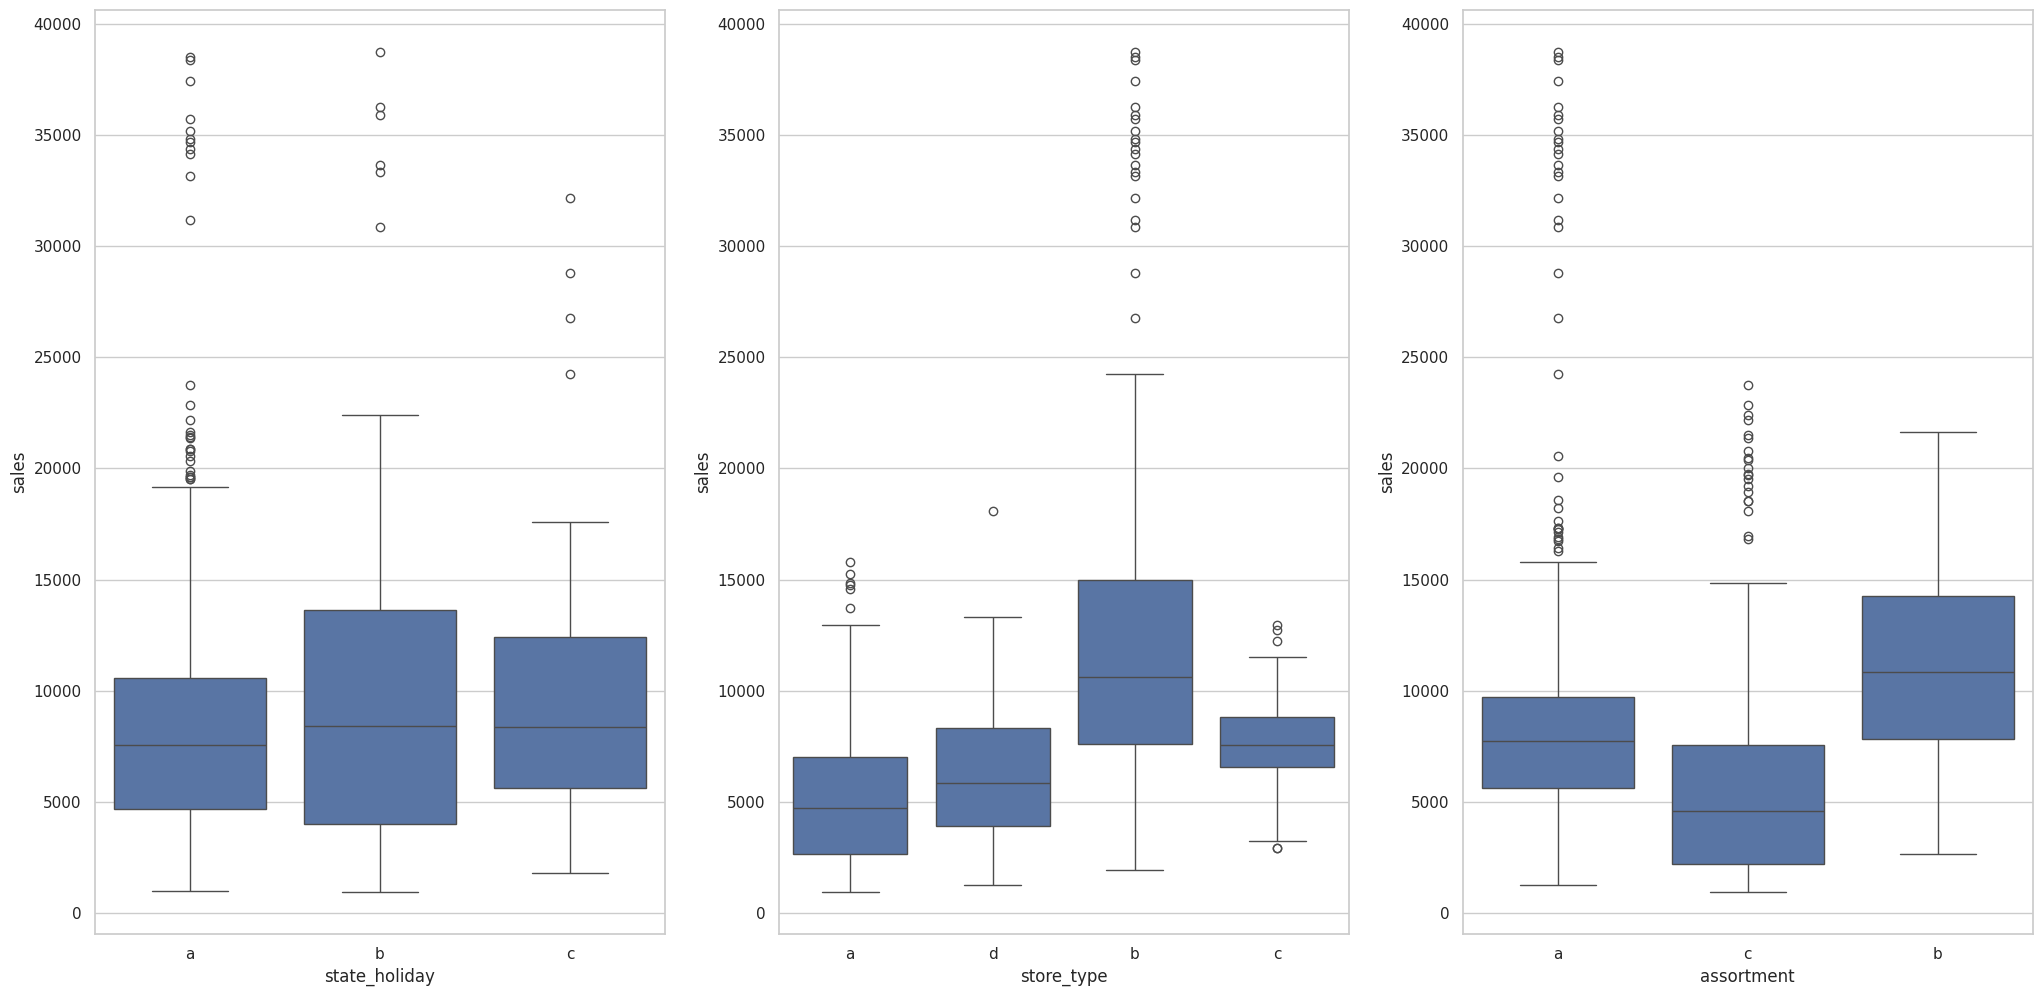

In [49]:
# Fazendo um boxplot para ter uma vizualização da forma que os dados estão em cada uma dessas variáveis.

aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot (1,3,1)
sns.boxplot( x= 'state_holiday', y='sales', data= aux1);

plt.subplot (1,3,2)
sns.boxplot( x= 'store_type', y='sales', data= aux1);

plt.subplot (1,3,3)
sns.boxplot( x= 'assortment', y='sales', data= aux1);

# 3.0  PERGUNTAS DE NÉGOCIOS

In [17]:
# Copiando o dataset
df2 = df1.copy()

Refleti sobre possíveis perguntas que os líderes da empresa poderiam fazer ou propor a um analista de dados. Para organizar essas ideias, desenvolvi um mapa mental, no qual inclui todos os aspectos que considero importantes e impactantes para as vendas diárias das lojas. Com base nesse mapa, elaborei diferentes hipóteses, que foram analisadas e respondidas no projeto.

Esse mapa mental foi produzido no site [coggle](https://coggle.it/?lang=pt-BR).

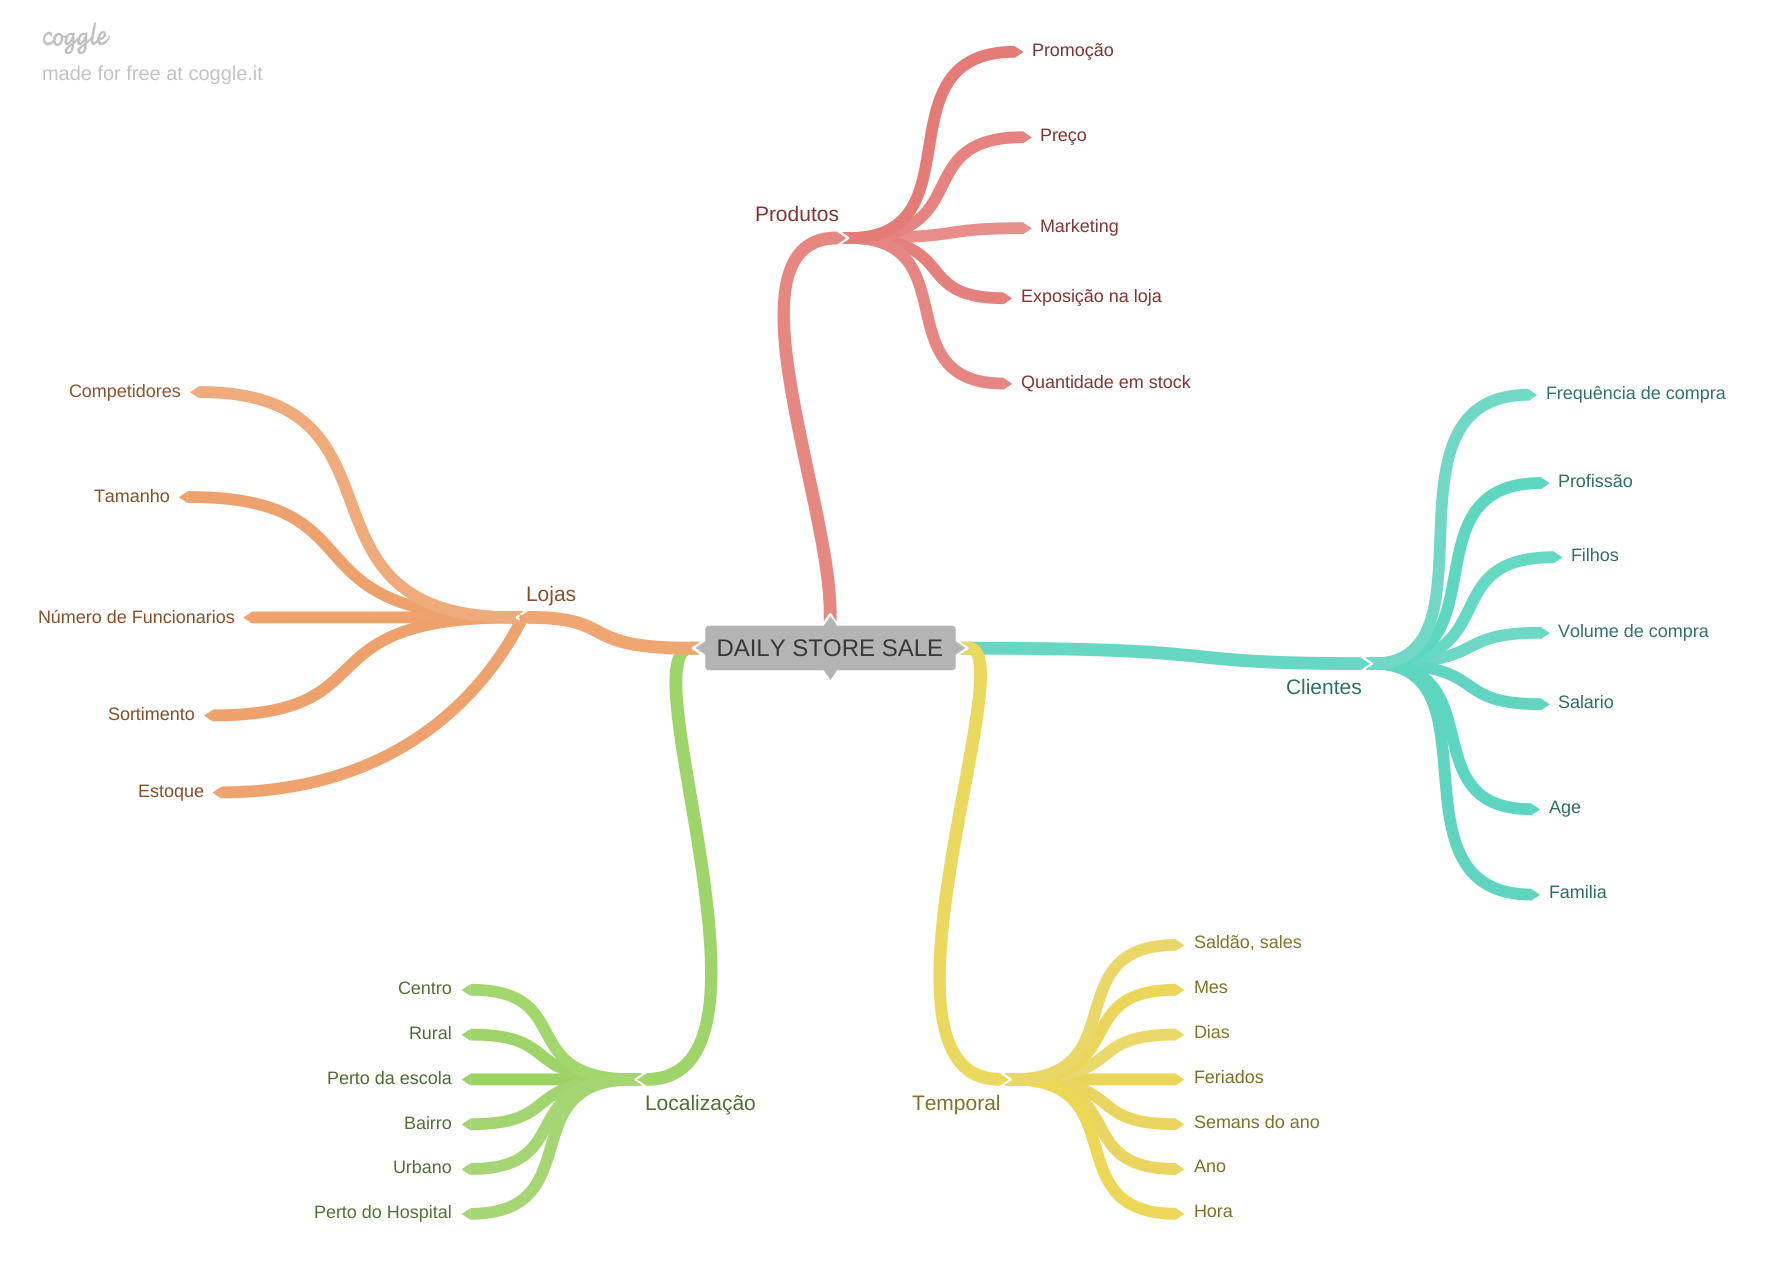

In [18]:
Image ('img/MindMap.png')

##  3.1 CRIANDO HIPÓTESES

Com base no mapa mental desenvolvido e no meu conhecimento de negócio, elaborei diversas perguntas que poderiam impactar significativamente as vendas diárias das lojas. Após uma análise criteriosa, selecionei onze hipóteses que considerei mais relevantes para o nosso objetivo. Essa seleção foi realizada com base na minha expertise e na compreensão das dinâmicas de mercado. A escolha das hipóteses também levou em conta meu julgamento sobre o potencial impacto que cada uma delas poderia ter na otimização dos resultados de vendas. 

Esse processo permitiu um foco mais direcionado na análise, visando gerar insights estratégicos e acionáveis para a empresa.

### 3.1.1 HIPÓTESES LOJA

**1.** Lojas com um numero maior de funcionarios deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais perto deveriam vender menos.

**6.** Lojas com competidores a mais tempo deveriam vender mais.


###  3.1.2 HIPÓTESES PRODUTO 

**1.** Lojas que invesem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produtos deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**4.** Lojas com promoções mais agressivas, deveriam vender mais.

**5.** Lojas com promoções ativas por mais tempo, deveriam vender mais.

**6.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.



###  3.1.3 HIPÓTESES TEMPO 

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas  deveriam vender mais ao longo do anos.

**3.** Lojas  deveriam vender mais no segundo semestre do ano.

**4.** Lojas  deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas  deveriam vender menos aos finais de semana.

**6.** Lojas  deveriam vender menos durante os feriados escolares.

##  3.2 LISTA FINAL DE HIPÓTESES

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais perto deveriam vender menos.

**3.** Lojas com competidores a mais tempo deveriam vender mais.

**4.** Lojas com promoções ativas por mais tempo, deveriam vender mais.

**5.** Lojas com mais promoções consecutivas deveriam vender mais.

**6.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**7.** Lojas  deveriam vender mais ao longo do anos.

**8.** Lojas  deveriam vender mais no segundo semestre do ano.

**9.** Lojas  deveriam vender mais depois do dia 10 de cada mês.

**10.** Lojas  deveriam vender menos aos finais de semana.

**11.** Lojas  deveriam vender menos durante os feriados escolares.




## 3.3 ENGENHARIA DE ATRIBUTOS (FEATURE ENGINEERING)

Engenharia de atributos é um  processo de transformação dos dados brutos em features (atributos) que possam gerar valor e aumentar o potencial do modelo a fim de responder a um problema de negócio.

Já que temos muitos dados decidi gerar novos atributos/variáveis/colunas que possam ser utéis na hora de responder perguntas de négocio.

In [19]:
#Criei várias variáveis que considerei úteis e fiz algumas alterações em colunas específicas para facilitar a interpretação dos dados.

# year.
df2['year'] = df2['date'].dt.year

# month 
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week
df2['week_of_year'] = df2['week_of_year'].astype( int )

# year week 
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime( year= x['competition_open_since_year'], month= x['competition_open_since_month'], day= 1 ), axis = 1) 

df2['competition_time_month'] = (( df2['date'] - df2 ['competition_since'])/30 ).apply (lambda x: x.days).astype(int)


# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)

df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days = 7) )

df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/ 7).apply(lambda x: x.days).astype(int)

# assortment

df2 ['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday

df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

#  4.0 FILTRAGEM DE VARIÁVEIS

Filtragem de variáveis é o processo de selecionar apenas as variáveis mais relevantes para a análise ou modelo, removendo aquelas que são irrelevantes, redundantes ou que podem introduzir ruído nos resultados. Essa etapa é fundamental para melhorar a eficiência e a precisão da análise.

Neste projeto, decidi filtrar as linhas, considerando apenas os períodos em que as lojas estavam abertas e com vendas maiores que zero, pois esses são os dados mais relevantes para a nossa análise.

In [20]:
#Copiando do dataset
df3 = df2.copy()

##  4.1 FILTRAGEM DAS LINHAS

In [21]:
# Filtrei as linhas que eu quero.
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 4.2 SELEÇÃO DAS COLUNAS

In [22]:
# Após todas essas etapas, selecionei as colunas que considerei inúteis e as removi do meu dataset.
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']

df3 = df3.drop(cols_drop, axis = 1)

#  5.0 ANÁLISE EXPLORATÓRIA DE DADOS

Neste projeto, realizei uma Análise Exploratória de Dados (EDA) de três maneiras diferentes. 
- Primeiro, conduzi uma análise univariada, examinando individualmente cada variável para entender sua distribuição e características.
- Em seguida, executei uma análise bivariada, respondendo às hipóteses que criei anteriormente e focando nas relações entre duas variáveis para identificar associações e padrões.
- Por fim, apliquei uma análise multivariada, analisando três ou mais variáveis simultaneamente para explorar interações e padrões complexos.

Essas etapas foram essenciais para obter uma compreensão aprofundada dos dados.

In [23]:
# Copiando do dataset
df4 = df3.copy()

##  5.1 ANÁLISE UNIVARIADA

### 5.1.1 VARIÁVEL RESPOSTA (VENDAS)

A variável resposta, também conhecida como variável dependente, é aquela que se deseja prever ou explicar em uma análise ou modelo estatístico. Ela é o resultado ou efeito que se espera observar, influenciado pelas variáveis independentes ou preditoras.

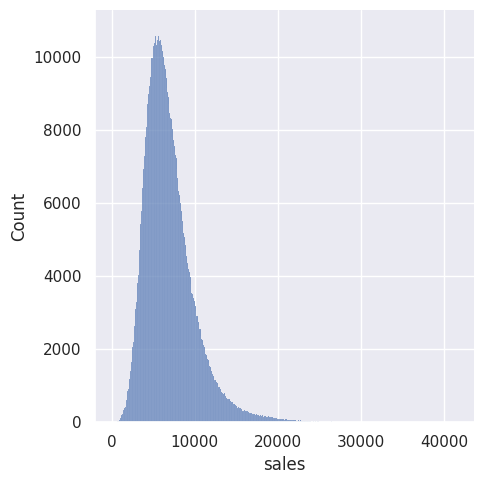

In [24]:
# Plotando o gráfico
sns.displot(df4['sales'], kde = False);

Esse gráfico é um histograma que mostra a distribuição das vendas. 

- A distribuição é assimétrica à direita, o que significa que a maioria das vendas está concentrada em valores mais baixos, enquanto poucos valores de vendas são significativamente altos.

- A maior contagem de ocorrências está em torno de valores de vendas entre 0 e 10.000. 

- A cauda longa à direita mostra que há alguns casos de vendas muito altas (acima de 10.000), mas eles são raros.


###  5.1.2 VARIÁVEIS NÚMERICAS

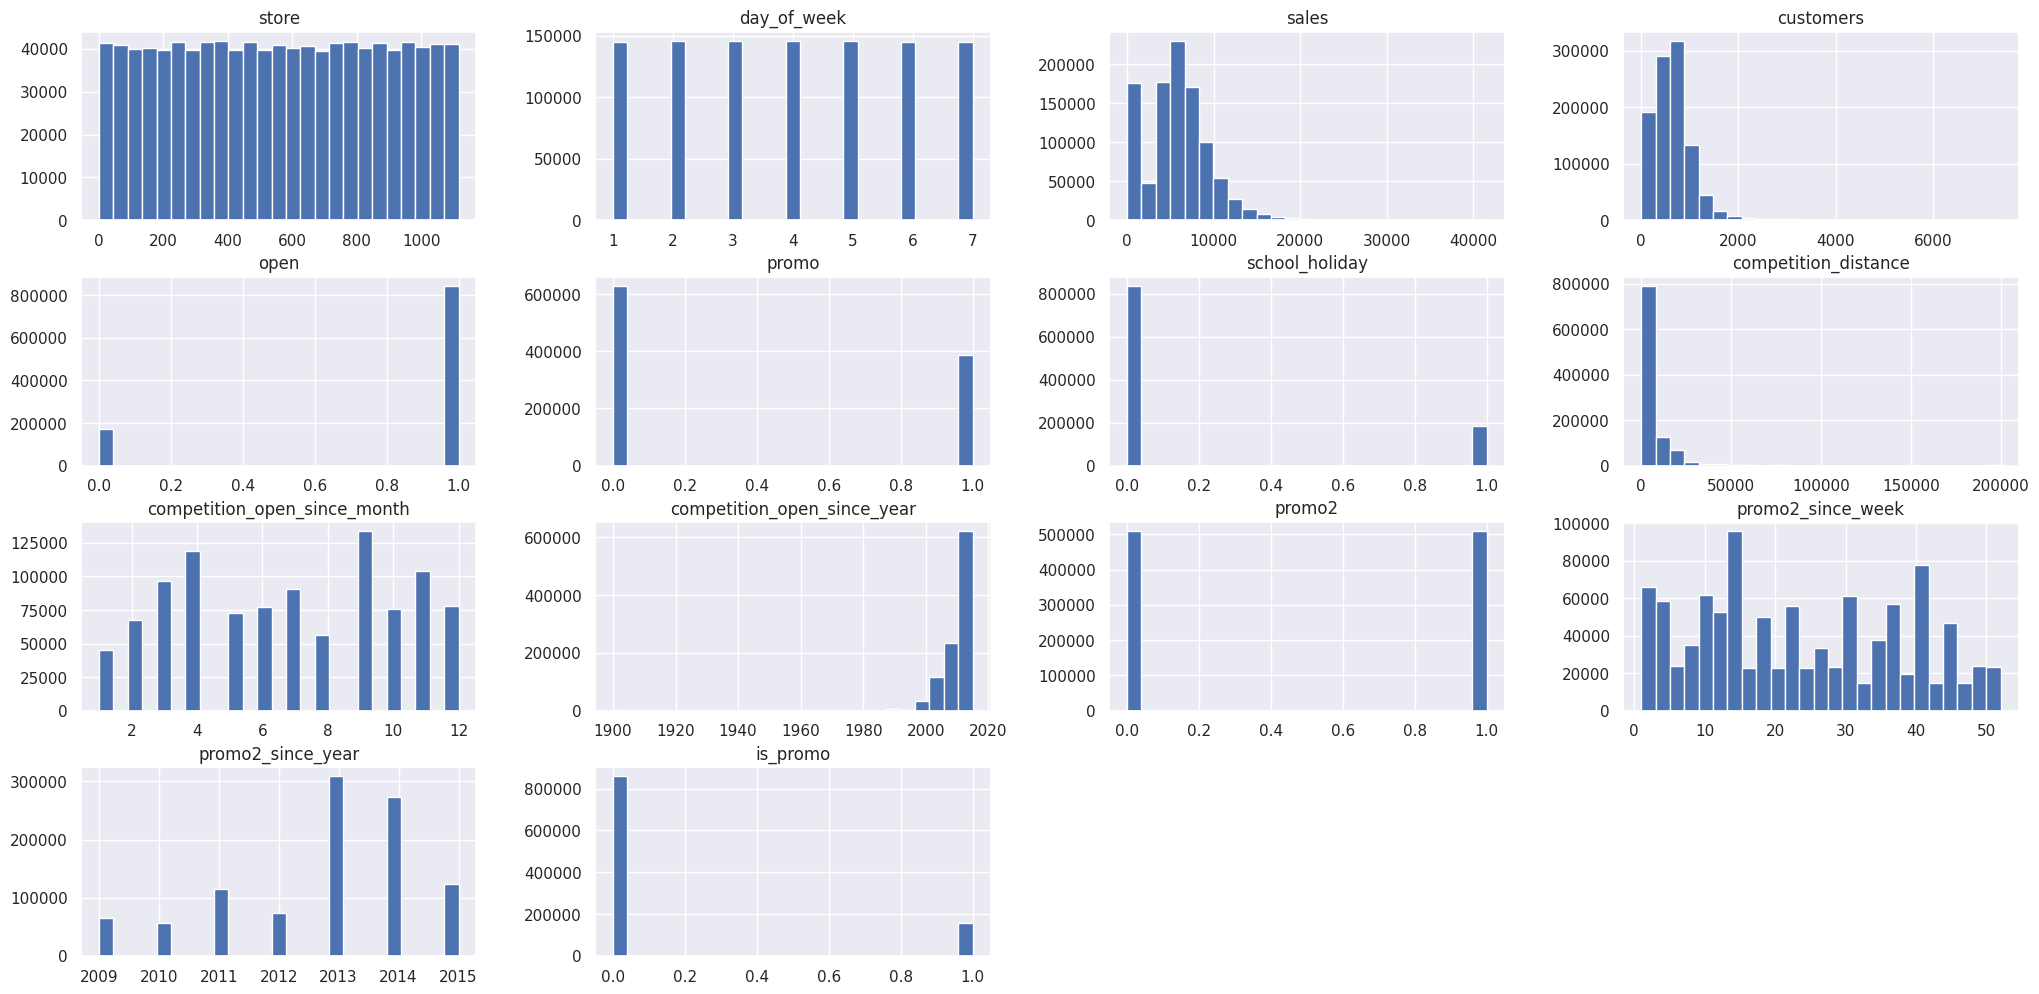

In [25]:
# Plotando histogramas de todas as variáveis númericas.
num_attributes.hist(bins = 25);

Para analisar a distribuição de variáveis numéricas, plotamos histogramas para cada variável. Esses histogramas revelam como os dados estão distribuídos, permitindo identificar padrões, assimetrias e possíveis outliers.

### 5.1.3 VARIÁVEIS CATEGÓRICAS

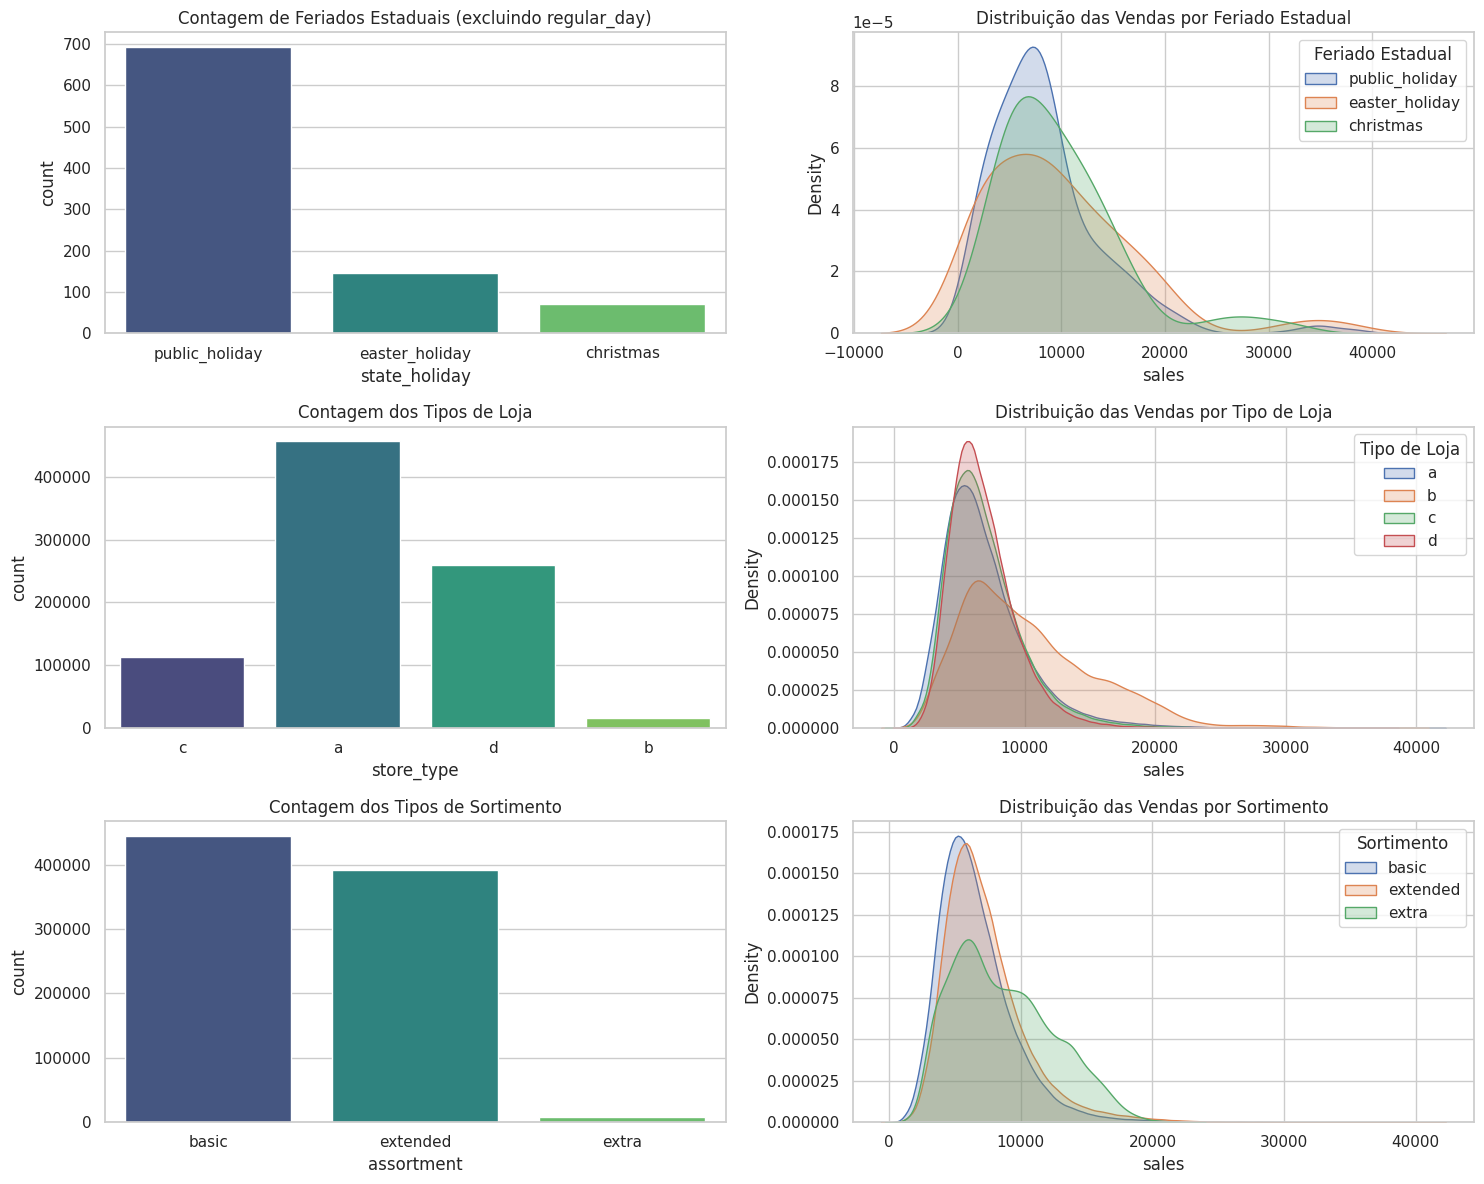

In [46]:
# Define o estilo para melhor estética
sns.set(style="whitegrid")

# Cria uma figura e um conjunto de subplots
plt.figure(figsize=(15, 12))

# Gráfico de contagem para state_holiday
plt.subplot(3, 2, 1)
filtered_df = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(data=filtered_df, x='state_holiday', palette='viridis')
plt.title('Contagem de Feriados Estaduais (excluindo regular_day)')

# Gráficos KDE das vendas com base em state_holiday
plt.subplot(3, 2, 2)
sns.kdeplot(data=df4[df4['state_holiday'] == 'public_holiday'], x='sales', label='public_holiday', shade=True)
sns.kdeplot(data=df4[df4['state_holiday'] == 'easter_holiday'], x='sales', label='easter_holiday', shade=True)
sns.kdeplot(data=df4[df4['state_holiday'] == 'christmas'], x='sales', label='christmas', shade=True)
plt.legend(title='Feriado Estadual')
plt.title('Distribuição das Vendas por Feriado Estadual')

# Gráfico de contagem para store_type
plt.subplot(3, 2, 3)
sns.countplot(data=df4, x='store_type', palette='viridis')
plt.title('Contagem dos Tipos de Loja')

# Gráficos KDE das vendas com base em store_type
plt.subplot(3, 2, 4)
sns.kdeplot(data=df4[df4['store_type'] == 'a'], x='sales', label='a', shade=True)
sns.kdeplot(data=df4[df4['store_type'] == 'b'], x='sales', label='b', shade=True)
sns.kdeplot(data=df4[df4['store_type'] == 'c'], x='sales', label='c', shade=True)
sns.kdeplot(data=df4[df4['store_type'] == 'd'], x='sales', label='d', shade=True)
plt.legend(title='Tipo de Loja')
plt.title('Distribuição das Vendas por Tipo de Loja')

# Gráfico de contagem para assortment
plt.subplot(3, 2, 5)
sns.countplot(data=df4, x='assortment', palette='viridis')
plt.title('Contagem dos Tipos de Sortimento')

# Gráficos KDE das vendas com base em assortment
plt.subplot(3, 2, 6)
sns.kdeplot(data=df4[df4['assortment'] == 'basic'], x='sales', label='basic', shade=True)
sns.kdeplot(data=df4[df4['assortment'] == 'extended'], x='sales', label='extended', shade=True)
sns.kdeplot(data=df4[df4['assortment'] == 'extra'], x='sales', label='extra', shade=True)
plt.legend(title='Sortimento')
plt.title('Distribuição das Vendas por Sortimento')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

# Impede a vizualização de FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

Eu decidi criar 2 gráficos para cada variável. 

- Um gráfico de [contagem](https://seaborn.pydata.org/generated/seaborn.countplot.html) que pode ser considerado um histograma para uma variável categórica, em vez de uma variável quantitativa, que vai mostrar a disbruição dos dados dentro das variáveis. 

- E um gráfico de [estimativa de densidade de núcleo (KDE)](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) que é um método para visualizar a distribuição das observações em um conjunto de dados, análogo a um histograma. O KDE representa os dados usando uma curva contínua de densidade de probabilidade em uma ou mais dimensões.

- Ao observar esses gráficos, podemos identificar alguns insights, como:

Apesar de ser apenas um dia, o Natal quase iguala a distribuição de vendas de todos os outros feriados públicos somados.

Os tipos de loja A, C e D apresentaram uma distribuição de vendas muito semelhante, enquanto o tipo de loja B registrou um número inferior de vendas. É importante analisar mais profundamente o motivo dessa discrepância nas lojas do tipo B, um dos motivos pode ser a pouca quantidade desse tipo de loja.

A maioria das lojas possui sortimento básico ou estendido. Embora haja poucas lojas com sortimento extra, elas ainda conseguem alcançar um volume de vendas considerável em comparação aos outros tipos de sortimento.

##   5.2 ANÁLISE BIVARIADA

### 5.2.1 **H1.** Lojas com maior sortimentos deveriam vender mais.
***FALSO*** Lojas com MAIOR sortimentos vendem MENOS.

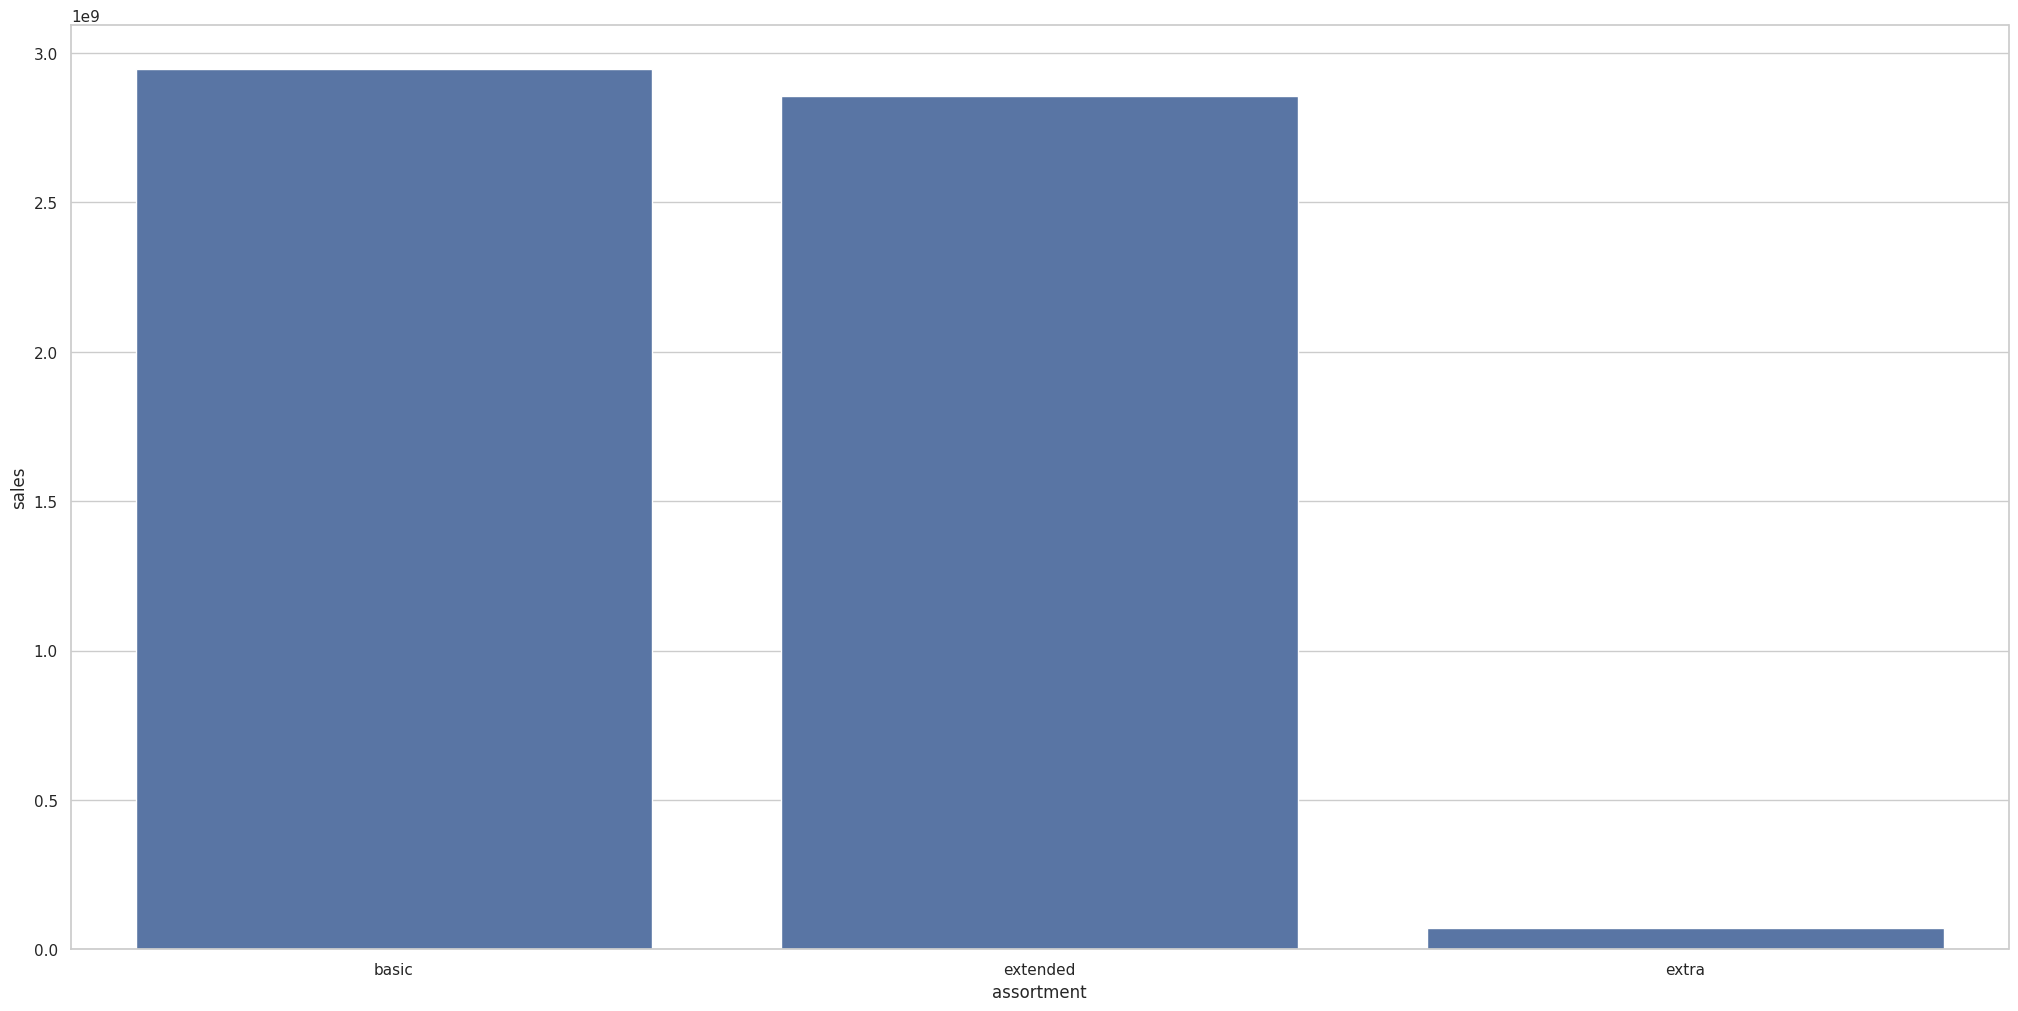

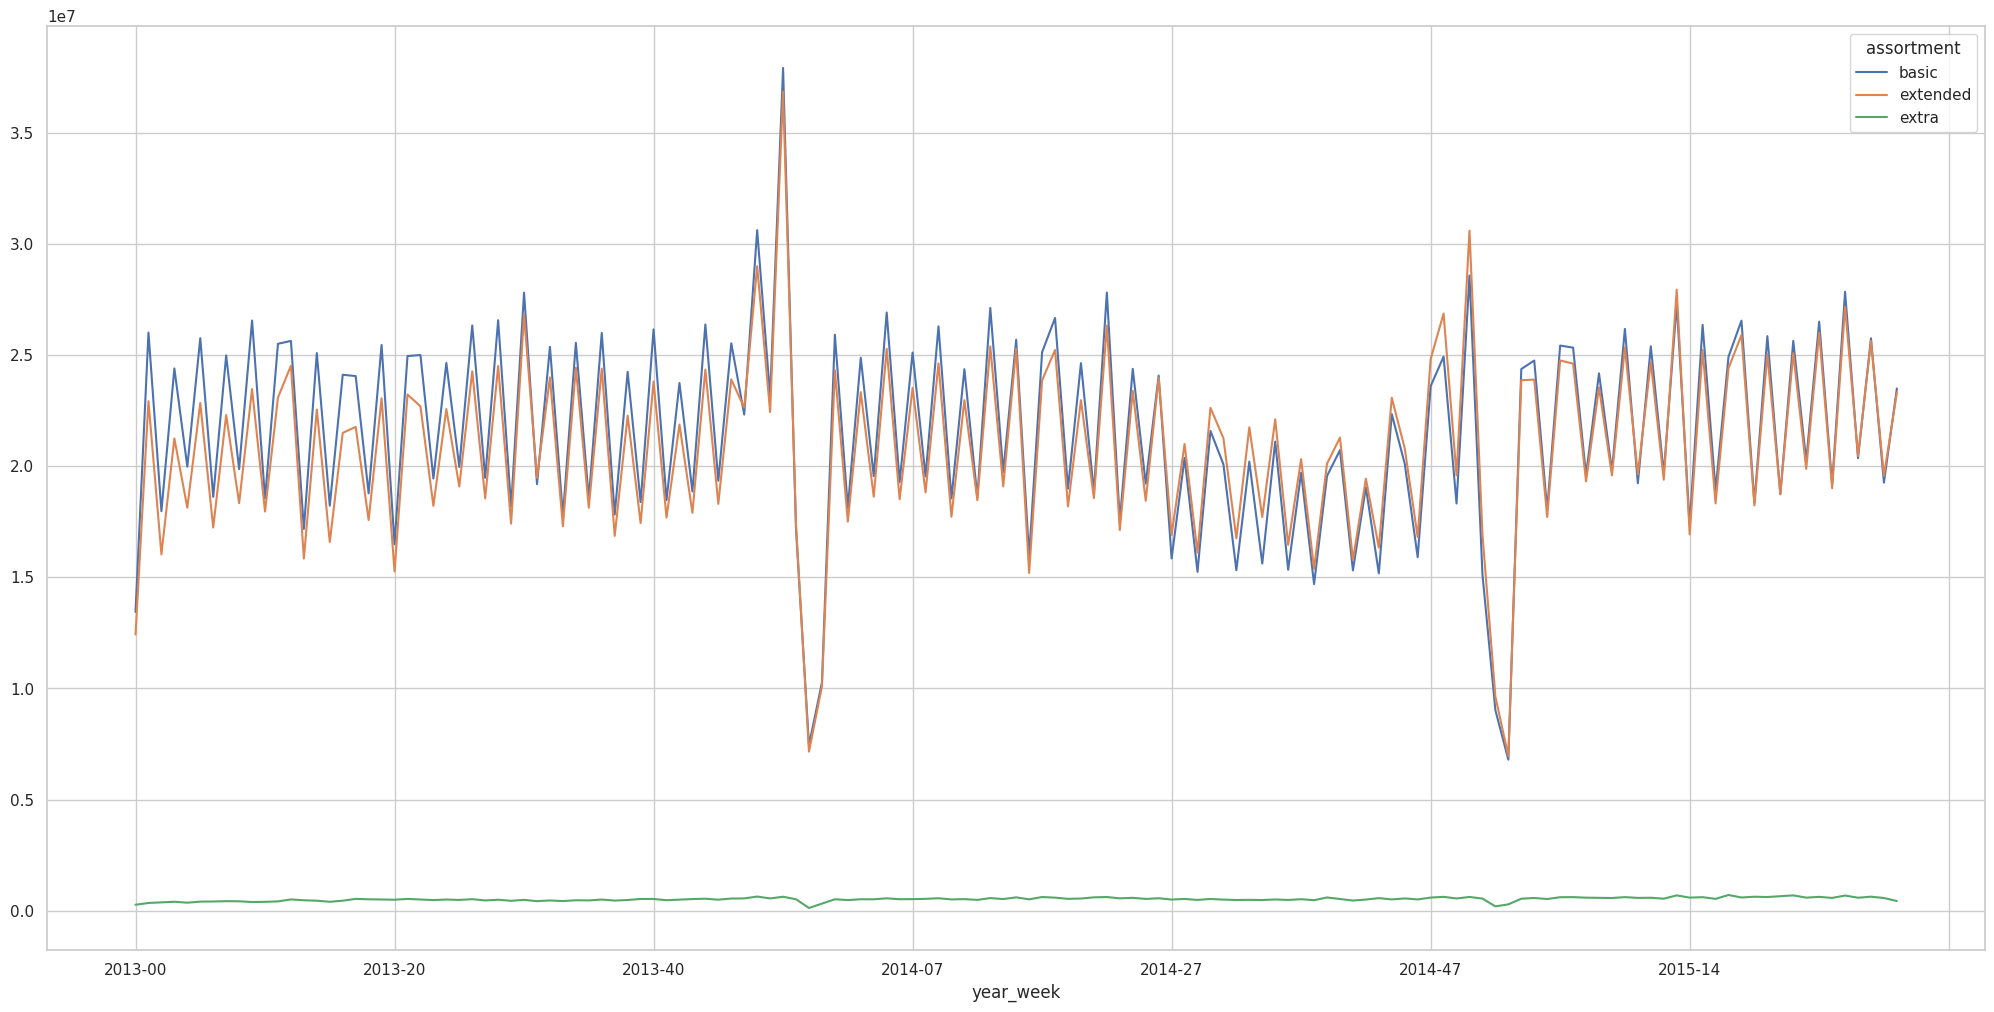

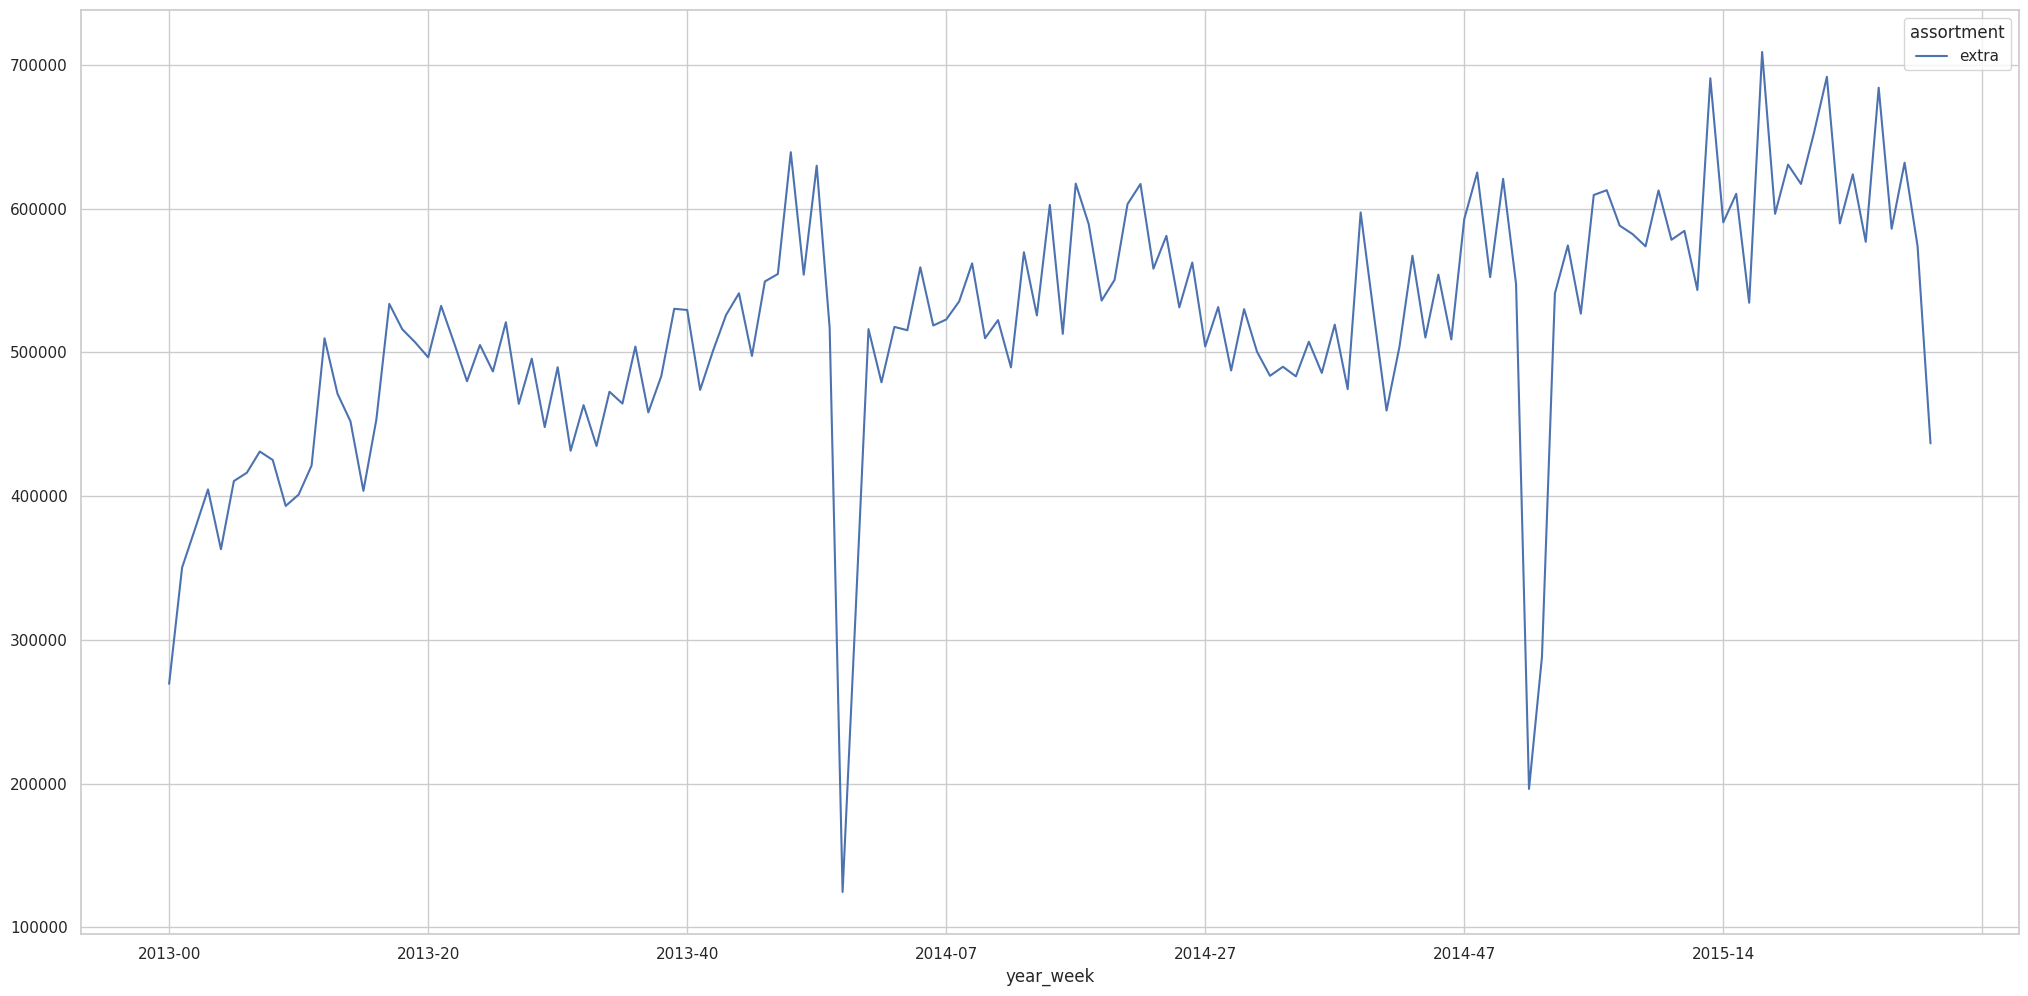

In [27]:
# Agrupamento das vendas por tipo de sortimento. 
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()

# Criar o Gráfico de barras 
sns.barplot(x='assortment', y = 'sales', data = aux1)

# Agrupamento das vendas por semana do ano e tipo de sortimento. 
aux2 = df4[['year_week','assortment', 'sales']].groupby(['year_week', 'assortment']).sum().reset_index()

# Criar o Gráfico pivô
aux2.pivot(index = 'year_week' , columns = 'assortment', values = 'sales').plot()

# Seleção do tipo de sortimento especifico "extra". 
aux3 = aux2[aux2['assortment'] == 'extra']

# Criar o Gráfico pivô
aux3.pivot(index = 'year_week' , columns = 'assortment', values = 'sales').plot();

###  5.2.2 **H2.** Lojas com competidores mais perto deveriam vender menos.
***FALSO*** Lojas com COMPETIDORES MAIS PERTO vendem MAIS. 

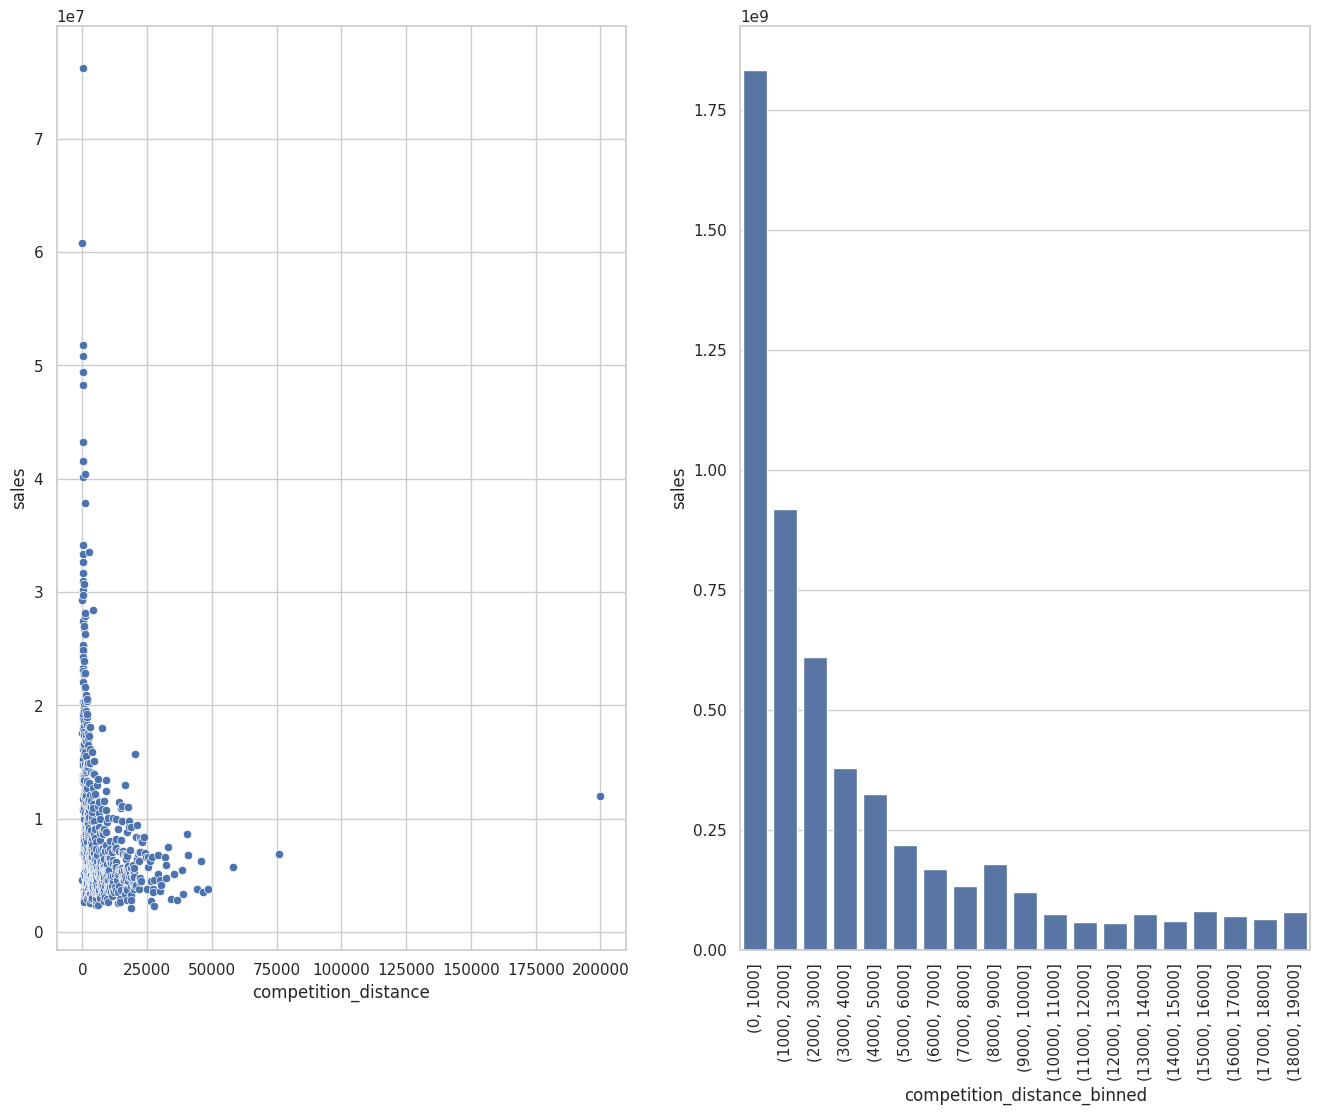

In [47]:
# Agrupando as vendas pela distância dos competidores. 
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

# Criando um painel em branco e selecioando onde esse gráfico ira ficar nele.
plt.subplot(1, 3, 1)

# Criar um gráfico de espalhamento.
sns.scatterplot(x='competition_distance', y='sales', data = aux1)

#Selecioando onde esse gráfico vai se localizar no painel já criado.
plt.subplot(1, 3, 2)

# Cria escalas
bins = list (np.arange (0, 20000, 1000))

# Coloca os dados de distância dos competidores em várias escalas. 
aux1['competition_distance_binned'] =  pd.cut(aux1['competition_distance'], bins = bins)

# Agrupa as vendas pela distância dos competidores em várias escalas.
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()

# Cria um gráfico de barras.
sns.barplot(x='competition_distance_binned', y='sales', data = aux2);

# Rotaciona o valor de coluna no eixo X. 
plt.xticks (rotation = 90);

###  5.2.3 **H3.** Lojas com competidores a mais tempo deveriam vender mais.
***FALSO*** Lojas com COMPETIDORES a mais tempo vendem MENOS.

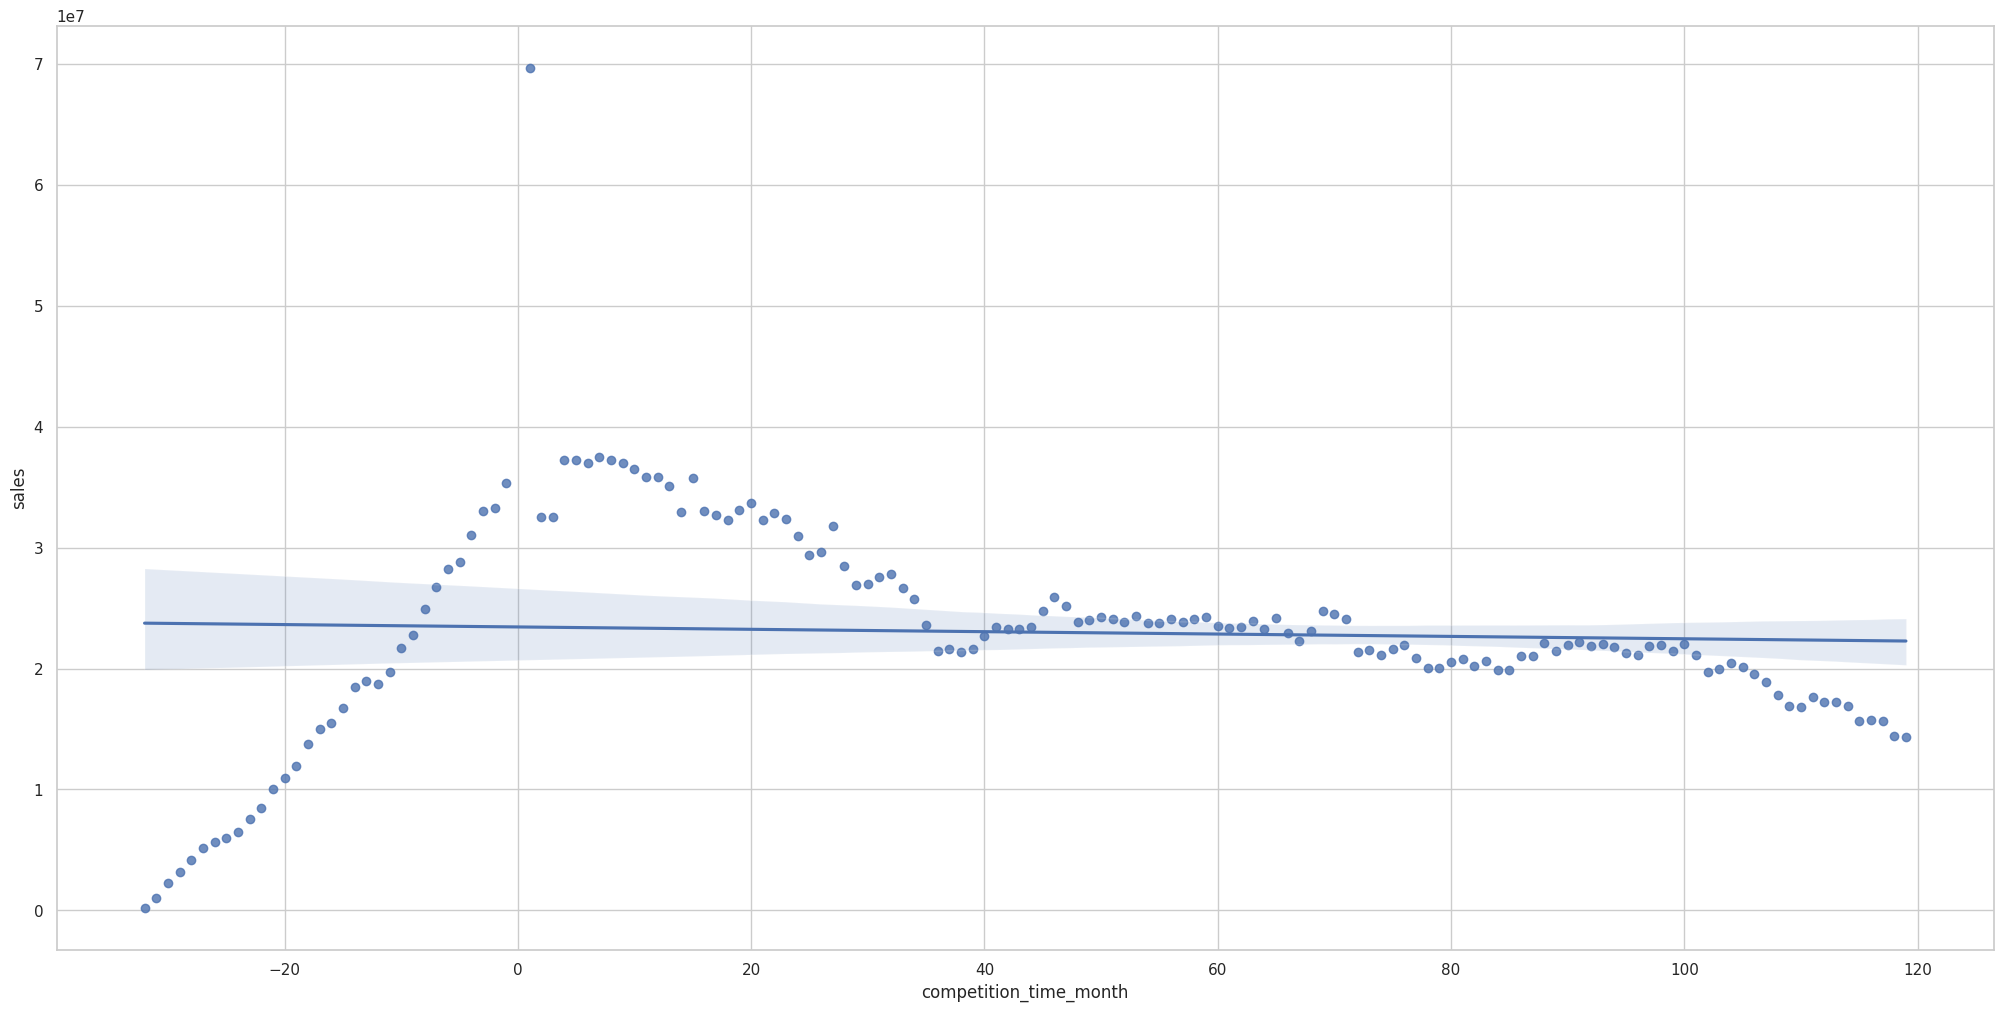

In [29]:
# Agrupa as vendas por tempo de competição em meses. 
aux1 = df4[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()

# Filtra por menos 120 meses e diferente do que 0 meses.
aux2 = aux1[(aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0)]

# Cria um gráfico de regressão.  
sns.regplot (x= 'competition_time_month', y= 'sales', data = aux2);

###   5.2.4 **H4.** Lojas com promoções ativas por mais tempo, deveriam vender mais.
***FALSO*** Lojas com promoções ativas por mais tempo vendem MENOS.

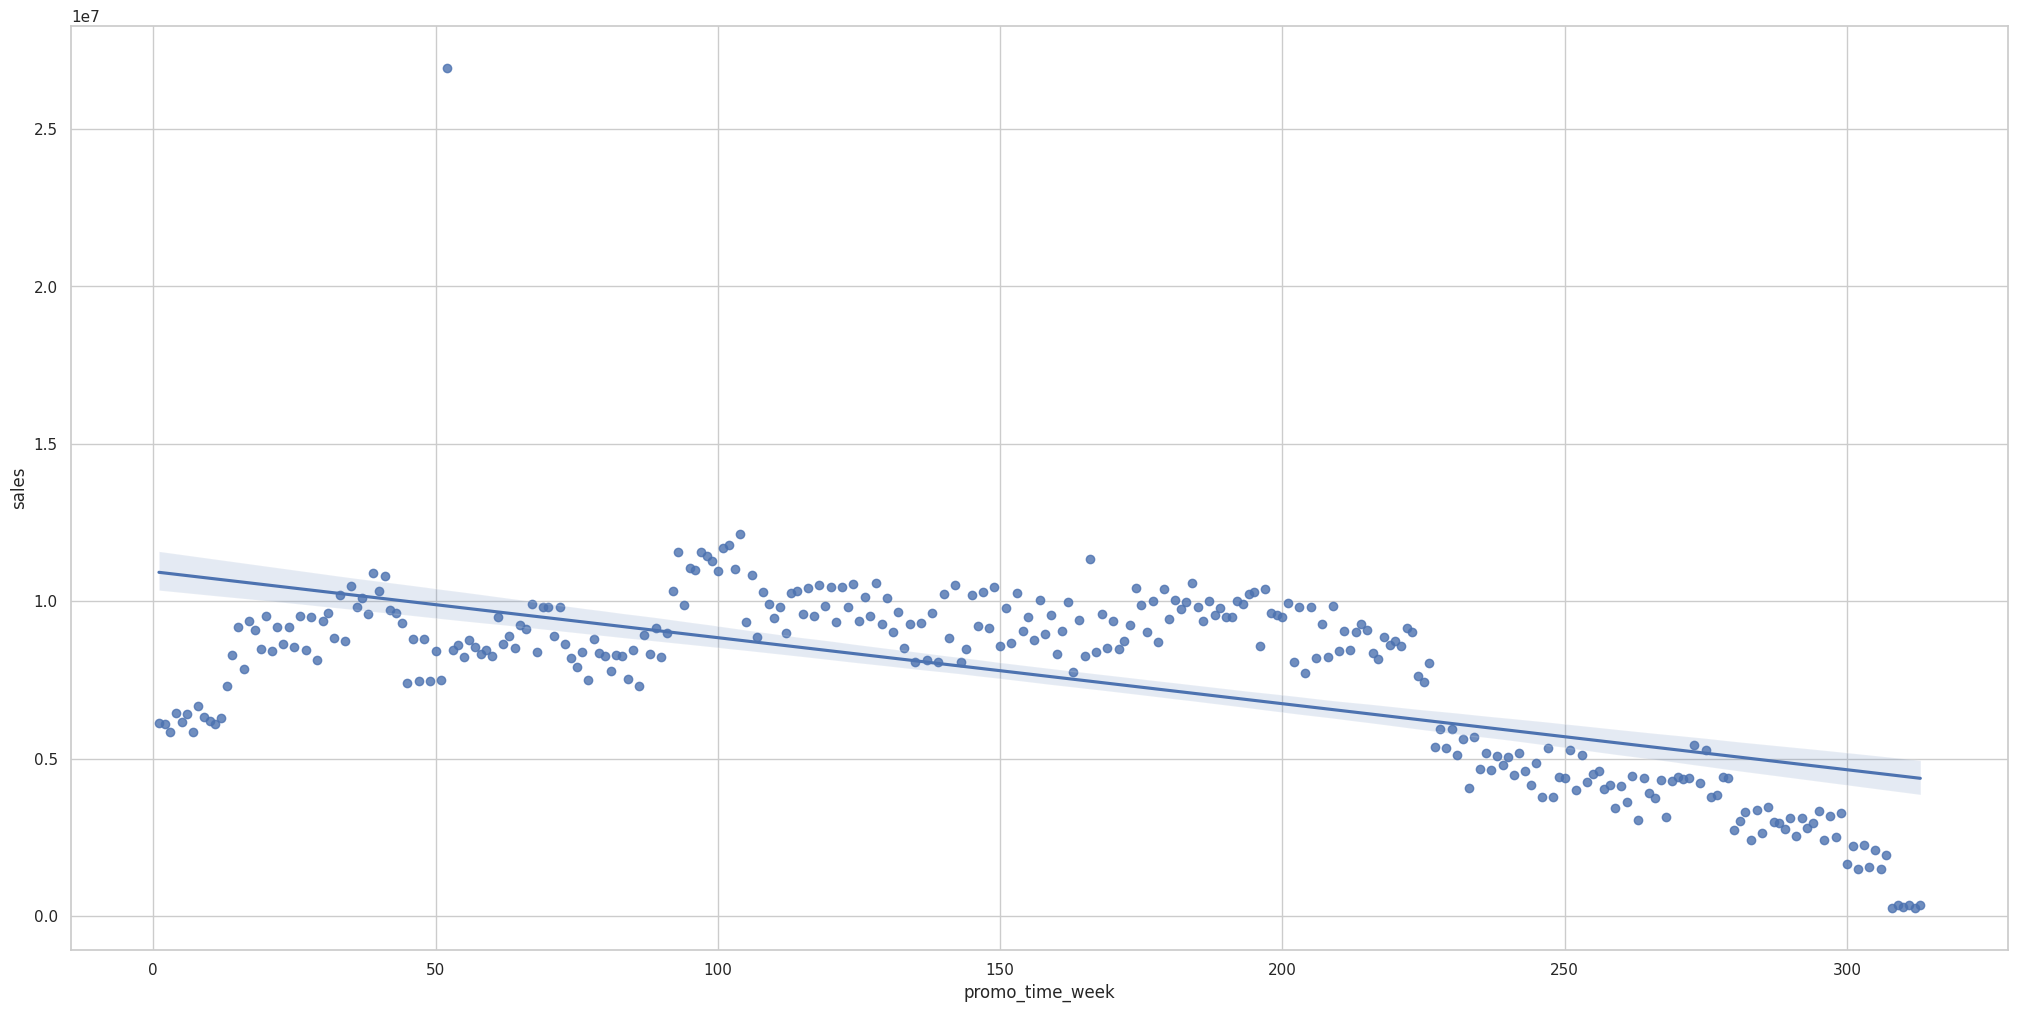

In [30]:
# Agrupa as vendas por tempo de promoção em semanas
aux1 = df4[['promo_time_week', 'sales']].groupby('promo_time_week').sum().reset_index()

# Filtra por linhas com mais do que 0 semanas, o que é considero no dataset como promoção estendida. 
aux2 = aux1[aux1['promo_time_week'] > 0]         

# Cria um gráfico de regressão
sns.regplot(x= 'promo_time_week', y= 'sales', data=aux2);       

### 5.2.5 **H5.** Lojas com mais promoções consecutivas deveriam vender mais.
***FALSO*** Lojas com mais promoções consecutivas vendem MENOS.

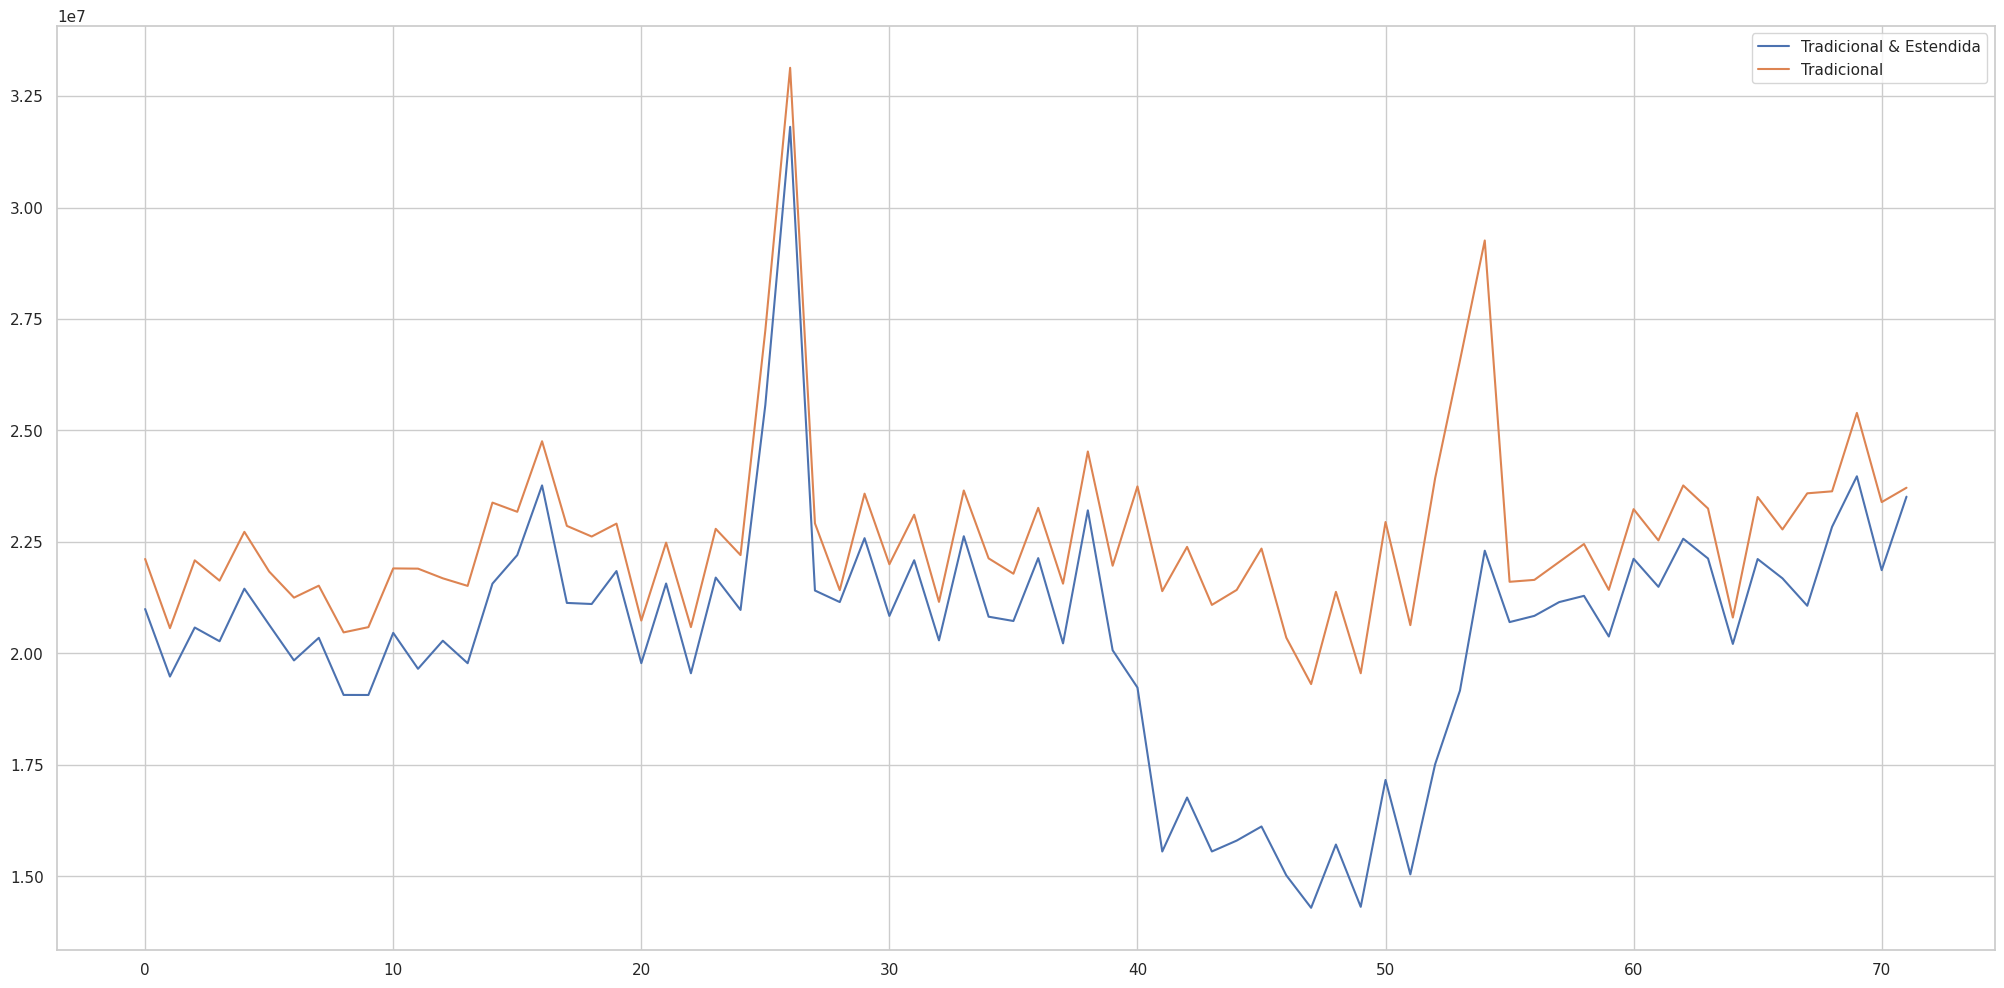

In [31]:
# Agrupa as vendas por semana do ano e filtra as linhas do dataset por promoções tradicionais e estendidas
aux1 = df4[(df4['promo'] == 1) & (df4['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').sum().reset_index()

# Cria um gráfico de linha com o primeiro agrupamento que eu fiz
ax = aux1.plot()

# Agrupa as vendas por semana do ano e filtra as linhas do dataset por promoções tradicionais
aux2 = df4[(df4['promo'] == 1) & (df4['promo2'] == 0)][['year_week', 'sales']].groupby('year_week').sum().reset_index()

#Cria um gráfico de linhas com os dois agrupamentos
aux2.plot(ax=ax)

# Coloca uma legenda para cada linha
ax.legend(labels=['Tradicional & Estendida', 'Tradicional']); 

### 5.2.6 **H6.** Lojas abertas durante o feriado de Natal deveriam vender mais.
***FALSO*** Lojas abertas durante o feriado de Natal vendem MENOS.

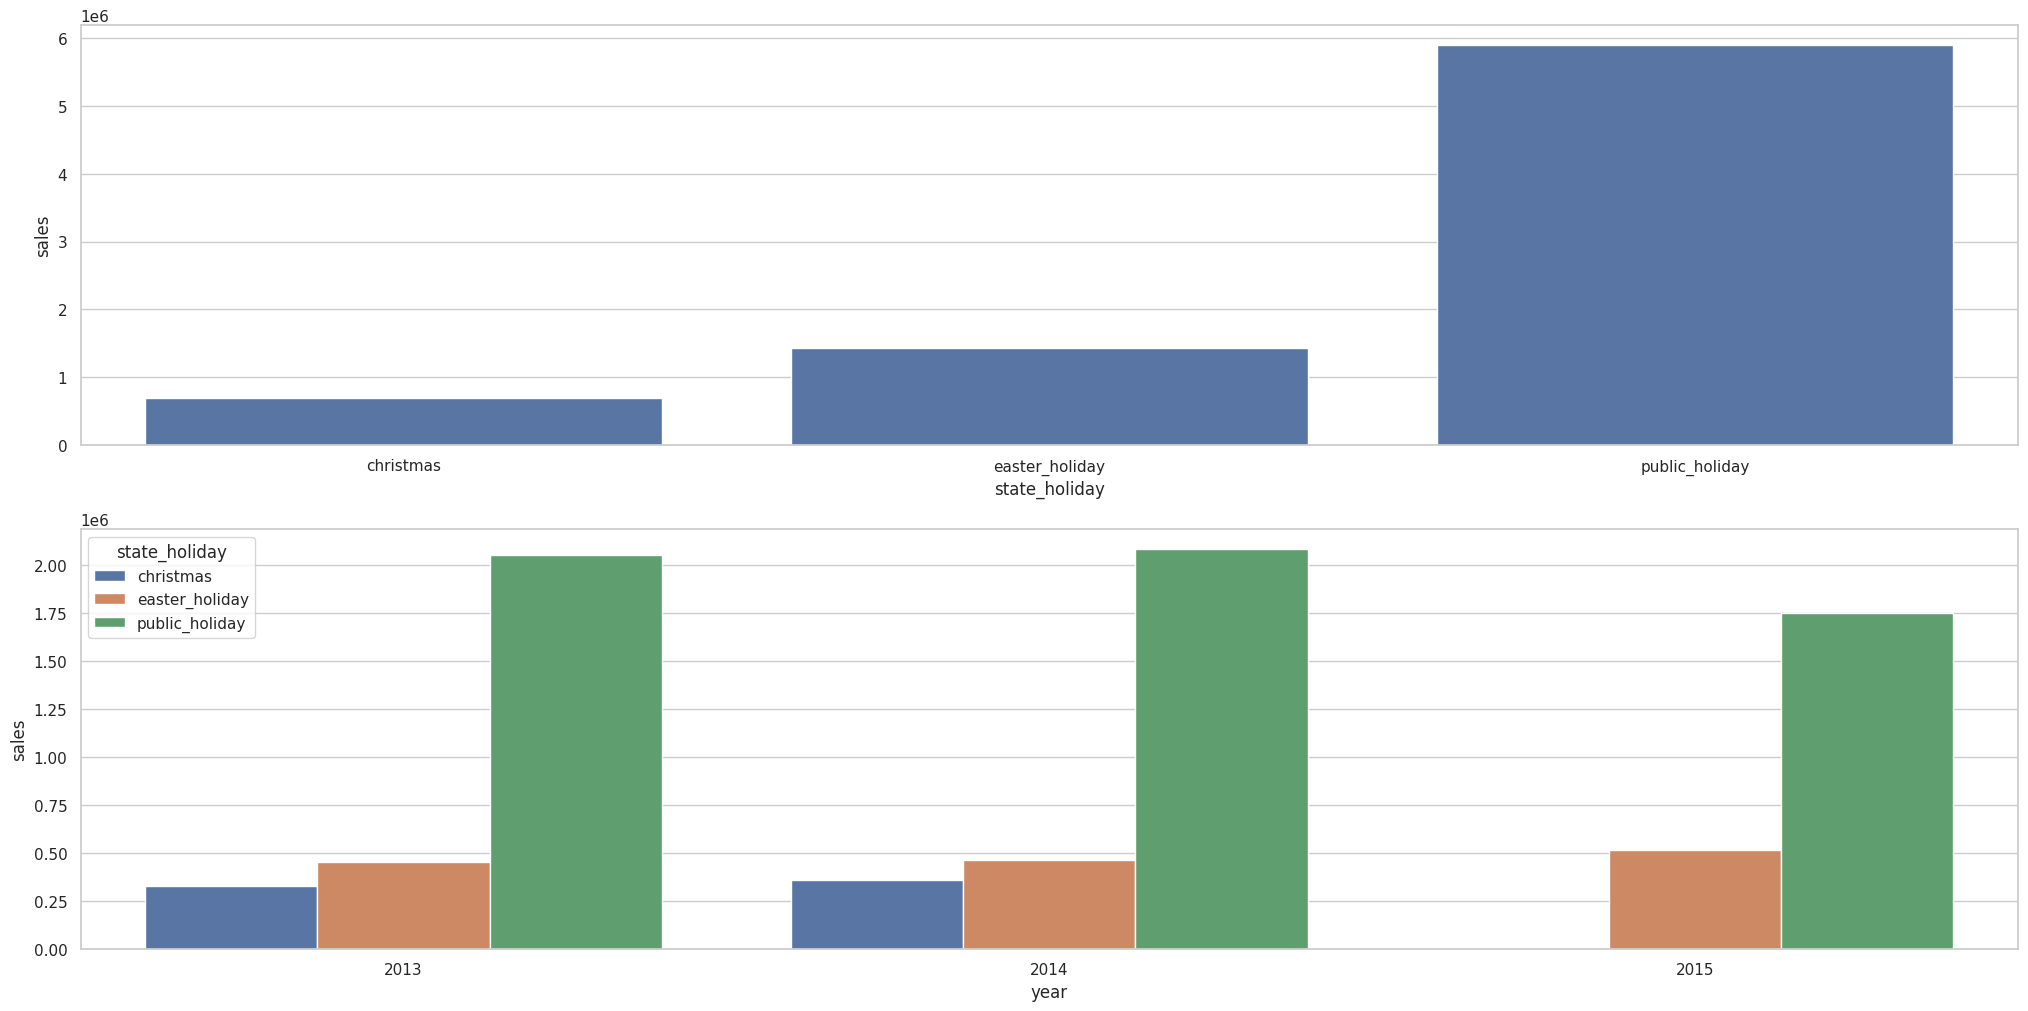

In [32]:
# Filtra a coluna State Holiday por qualquer coisa diferente de regular day
aux = df4[df4['state_holiday']!= 'regular_day']

# Agrupa as vendas por feriados
aux1 = aux[['state_holiday', 'sales']].groupby('state_holiday').sum().reset_index()

# Cria um painel e coloca o gráfico em uma posição específica dele
plt.subplot(2, 1, 1 )

# Cria um gráfico de barras 
sns.barplot(x= 'state_holiday', y= 'sales', data=aux1)

# Posiciona um gráfico no painel
plt.subplot(2, 1, 2 )

# Agrupa as vendas por ano e feriados estaduais
aux2 = aux[['year', 'state_holiday', 'sales']].groupby (['year', 'state_holiday']).sum().reset_index()

# Cria um gráfico de barras
sns.barplot(x= 'year', y= 'sales', hue = 'state_holiday', data=aux2);

### 5.2.7 **H7.** Lojas deveriam vender mais ao longo do anos.
***FALSO*** Lojas vendem MENOS ao longo dos anos.

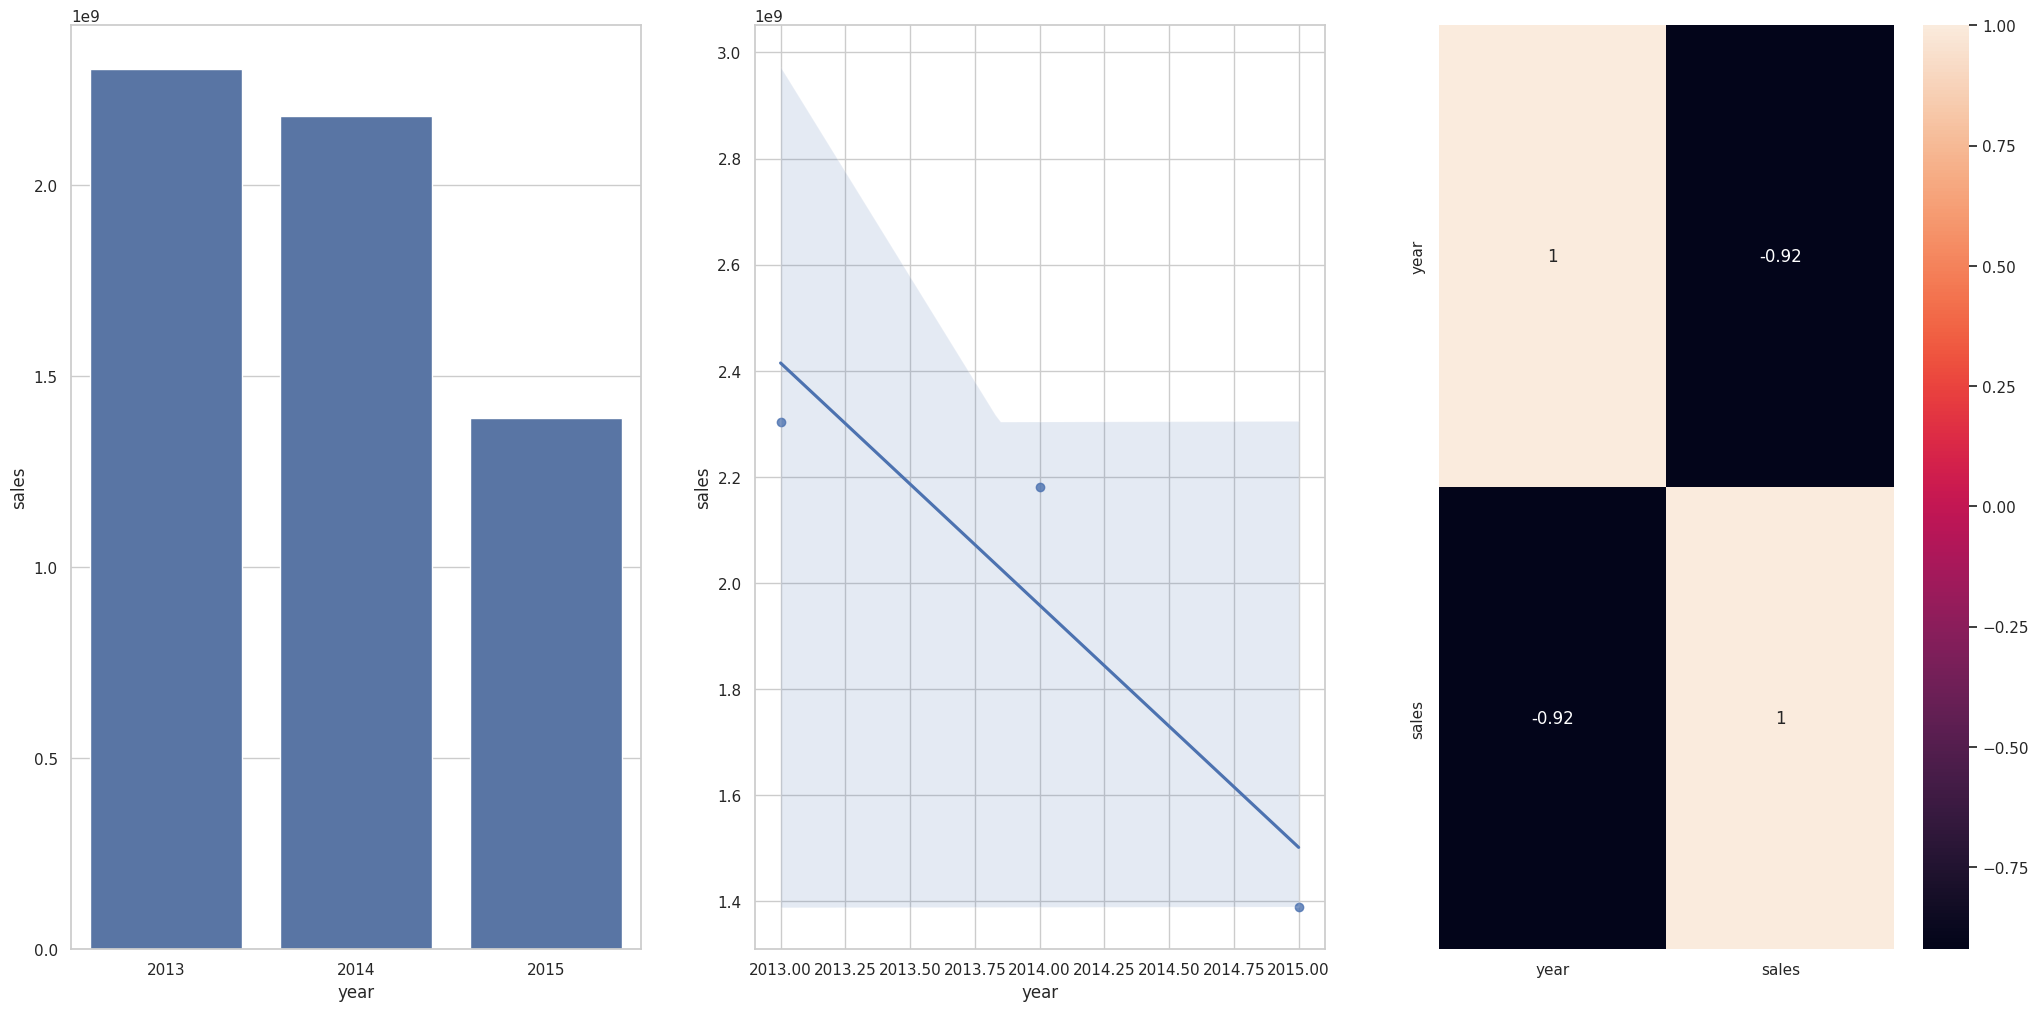

In [33]:
# Agrupa as vendas por ano
aux1 = df4[['year', 'sales']].groupby('year').sum().reset_index()

# Cria um painel e coloca o gráfico em uma posição específica dele
plt.subplot (1, 3, 1)

# Cria um gráfico de barras
sns.barplot (x='year', y='sales', data=aux1)

# Posiciona um gráfico no painel
plt.subplot (1, 3, 2)

# Cria um gráfico de regressão linear
sns.regplot (x='year', y='sales', data=aux1)

# Posiciona um gráfico no painel
plt.subplot (1, 3, 3)

# Cria um gráfico de heat map 
sns.heatmap (aux1.corr('pearson'), annot= True);

Um heat map de correlação é uma visualização gráfica que mostra as relações entre variáveis em um conjunto de dados. Cada célula do gráfico representa o coeficiente de correlação entre duas variáveis, com cores indicando a força e a direção da correlação. Cores mais escuras ou intensas geralmente indicam correlações mais fortes, sejam positivas ou negativas, enquanto cores mais claras indicam correlações mais fracas ou inexistentes. É uma ferramenta útil para identificar rapidamente padrões e associações entre variáveis.

Nesse hipótese, esse gráfico nos mostra que as variáveis vendas e ano tem um forte correlação negativa. O que indica que quanto maior o número de anos menor a quantidade de vendas. 

###  5.2.8 **H8.** Lojas deveriam vender mais no segundo semestre do ano.
***FALSO*** Lojas vendem MENOS no segundo semestre do ano.

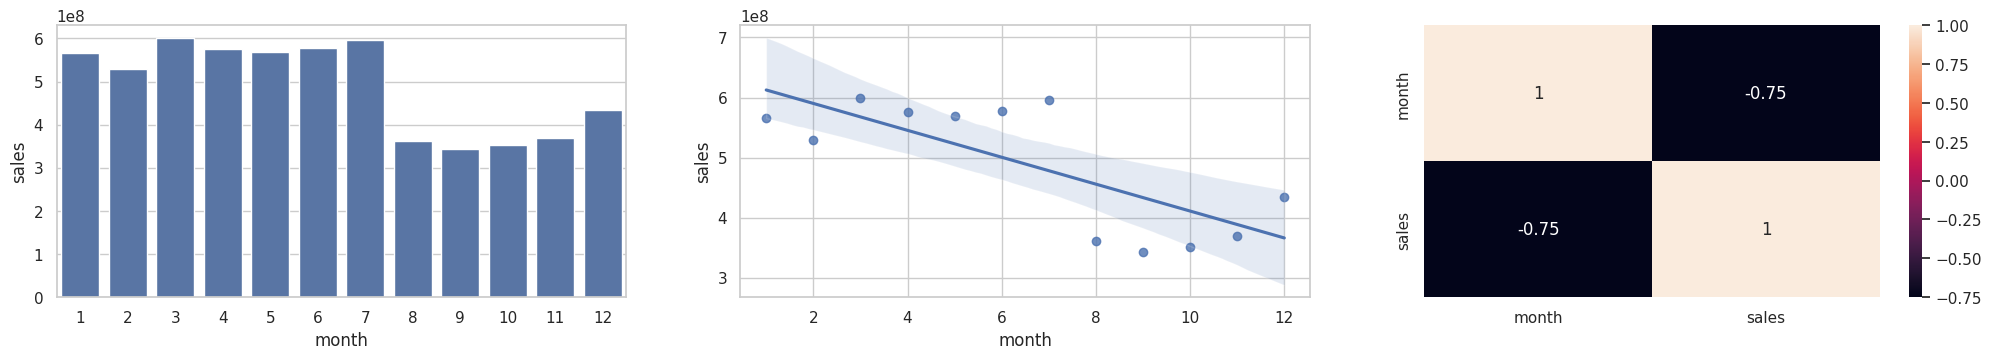

In [34]:
# Agrupa as vendas por mês
aux1 =df4[['month', 'sales']].groupby('month').sum().reset_index()

# Cria um painel e coloca o gráfico em uma posição específica dele
plt.subplot (3, 3, 1)

# Cria um gráfico de barras
sns.barplot (x='month', y= 'sales', data=aux1)

# Posiciona um gráfico no painel
plt.subplot (3, 3, 2)

# Cria um gráfico de regressão linear
sns.regplot (x='month', y='sales', data=aux1)

# Posiciona um gráfico no painel
plt.subplot (3, 3, 3)

# Cria um gráfico de heat map 
sns.heatmap (aux1.corr('pearson'), annot= True);

###  5.2.9 **H9.** Lojas deveriam vender mais depois do dia 10 de cada mês.
***VERDADEIRO*** Lojas vendem MAIS depos do dia 10 de cada mês.

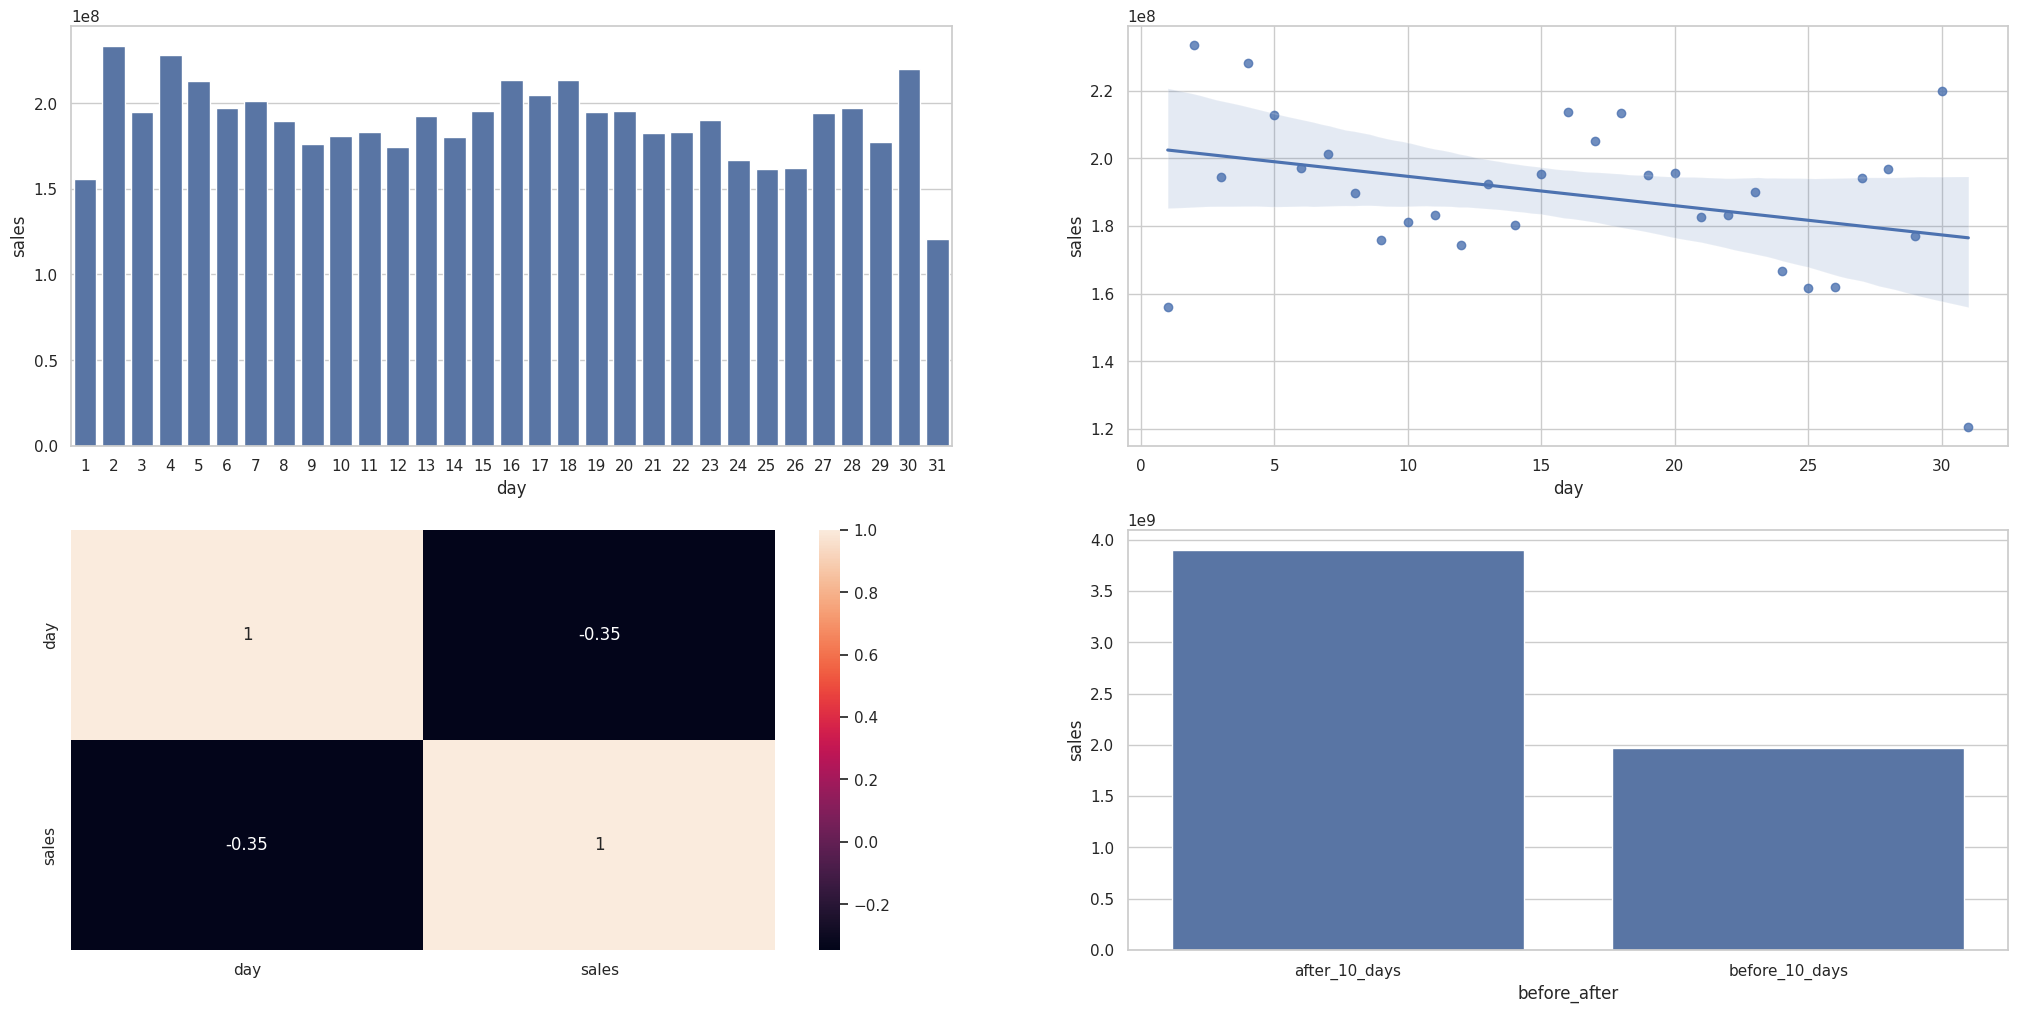

In [35]:
# Agrupa as vendas por dias
aux1 = df4[['day', 'sales']].groupby('day').sum().reset_index()

# Cria um painel e coloca o gráfico em uma posição específica dele
plt.subplot (2, 2, 1)

# Cria um gráfico de barras
sns.barplot(x='day', y='sales', data=aux1);

# Posiciona um gráfico no painel
plt.subplot (2, 2, 2)

# Cria um gráfico de regressão linear 
sns.regplot (x='day', y='sales', data=aux1)

# Posiciona um gráfico no painel
plt.subplot (2, 2, 3)

# Cria um gráfico de heat map 
sns.heatmap (aux1.corr('pearson'), annot= True);

# Cria uma coluna nova especificando se o dia é depois de 10 dias ou antes de 10 dias
aux1['before_after'] = aux1['day'].apply(lambda x: 'before_10_days' if x <= 10 else 'after_10_days')

# Posiciona um gráfico no painel
plt.subplot (2, 2, 4)

# Agrupa as vendas por ser ou não antes dos 10 primeiros dias do mês
aux2 = aux1[['before_after', 'sales']].groupby('before_after').sum().reset_index()

# Cria um gráfico de barras
sns.barplot(x='before_after', y= 'sales', data=aux2);

### 5.2.10 **H10.** Lojas deveriam vender menos aos finais de semana.
***VERDADEIRO*** Lojas vendem menos aos finais de semana, principalmente domingo.

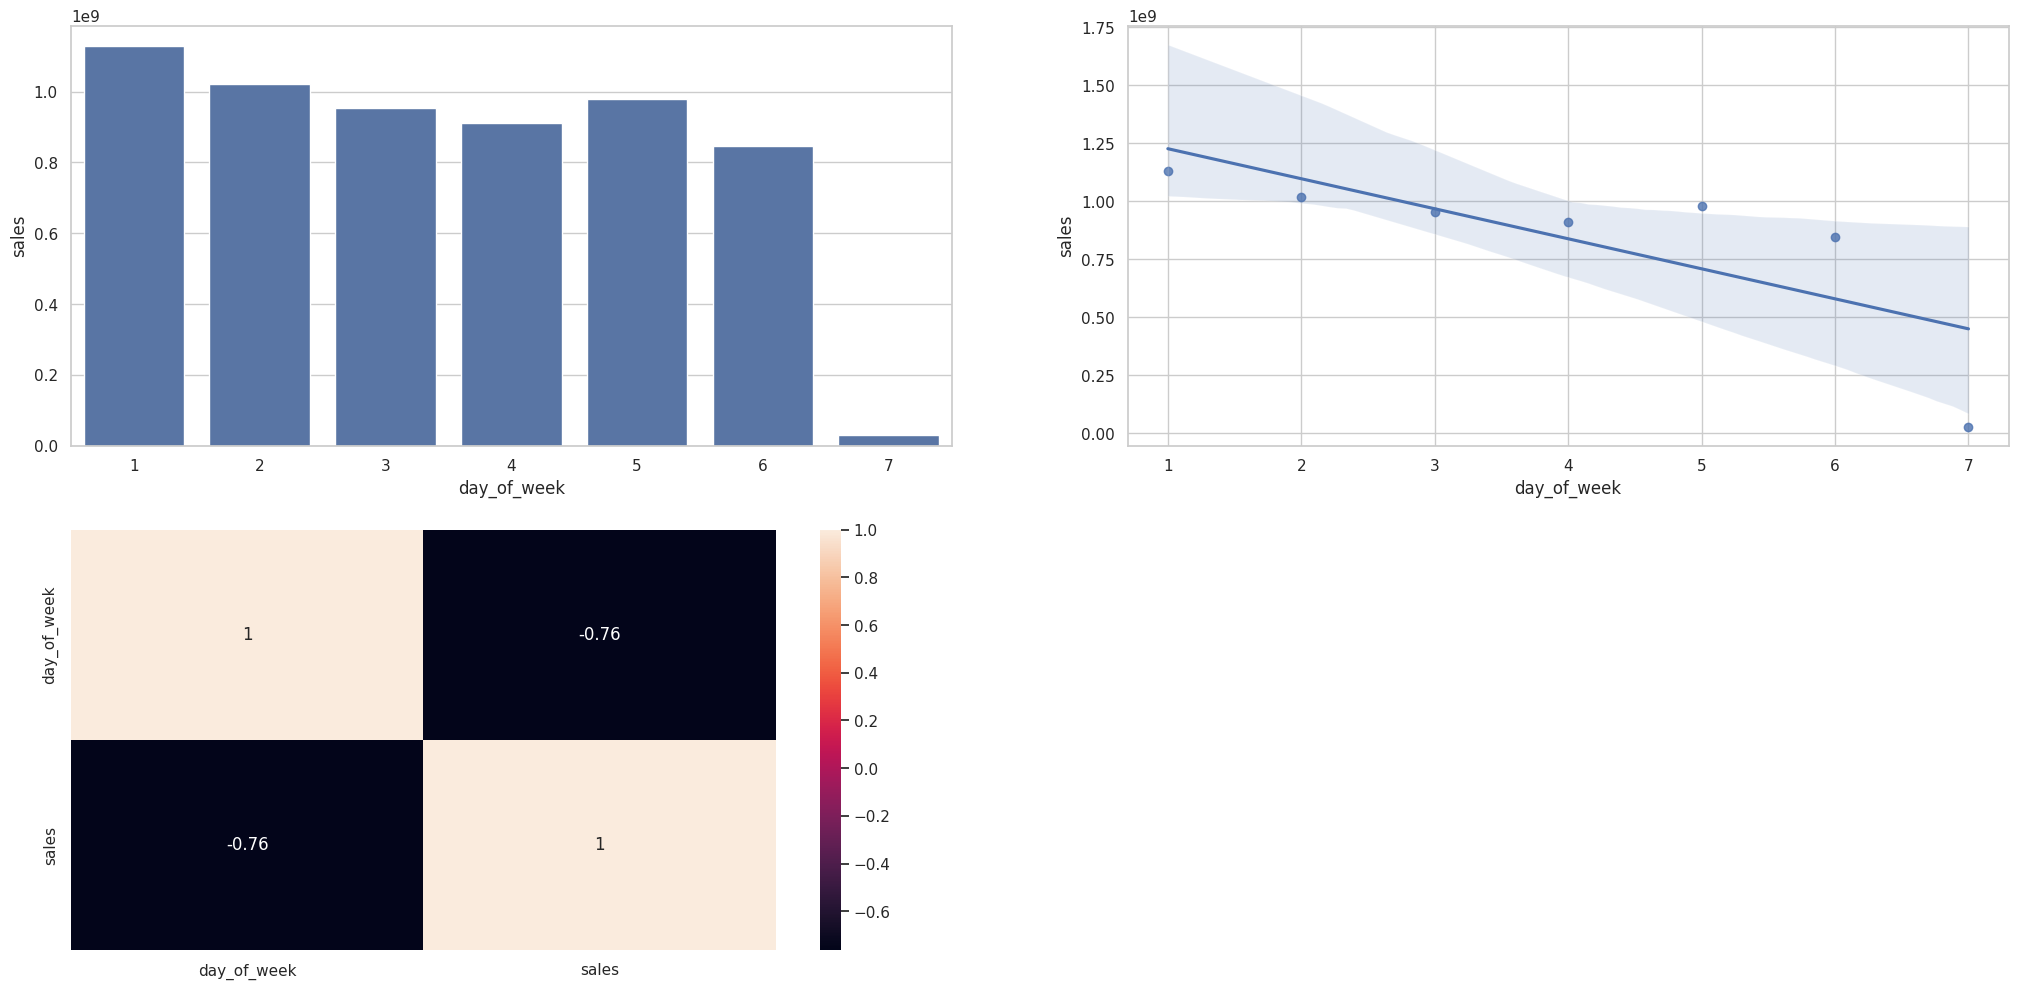

In [36]:
# Agrupar as vendas por dia da semana
aux1 = df4[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()

# Cria um painel e coloca o gráfico em uma posição específica dele
plt.subplot (2, 2, 1)

# Posiciona um gráfico no painel
sns.barplot(x='day_of_week', y= 'sales', data=aux1);

# Posiciona um gráfico no painel
plt.subplot (2, 2, 2)

# Cria um gráfico de regressão linear 
sns.regplot(x='day_of_week', y= 'sales', data=aux1);

# Posiciona um gráfico no painel
plt.subplot (2, 2, 3)

# Cria um gráfico de heat map 
sns.heatmap(aux1.corr('pearson'), annot=True);

### 5.2.11 **H11.** Lojas deveriam vender menos durante os feriados escolares.
***VERDADEIRO*** Lojas vendem MENOS durante os feriados escolares, exceto Julho e Agosto.

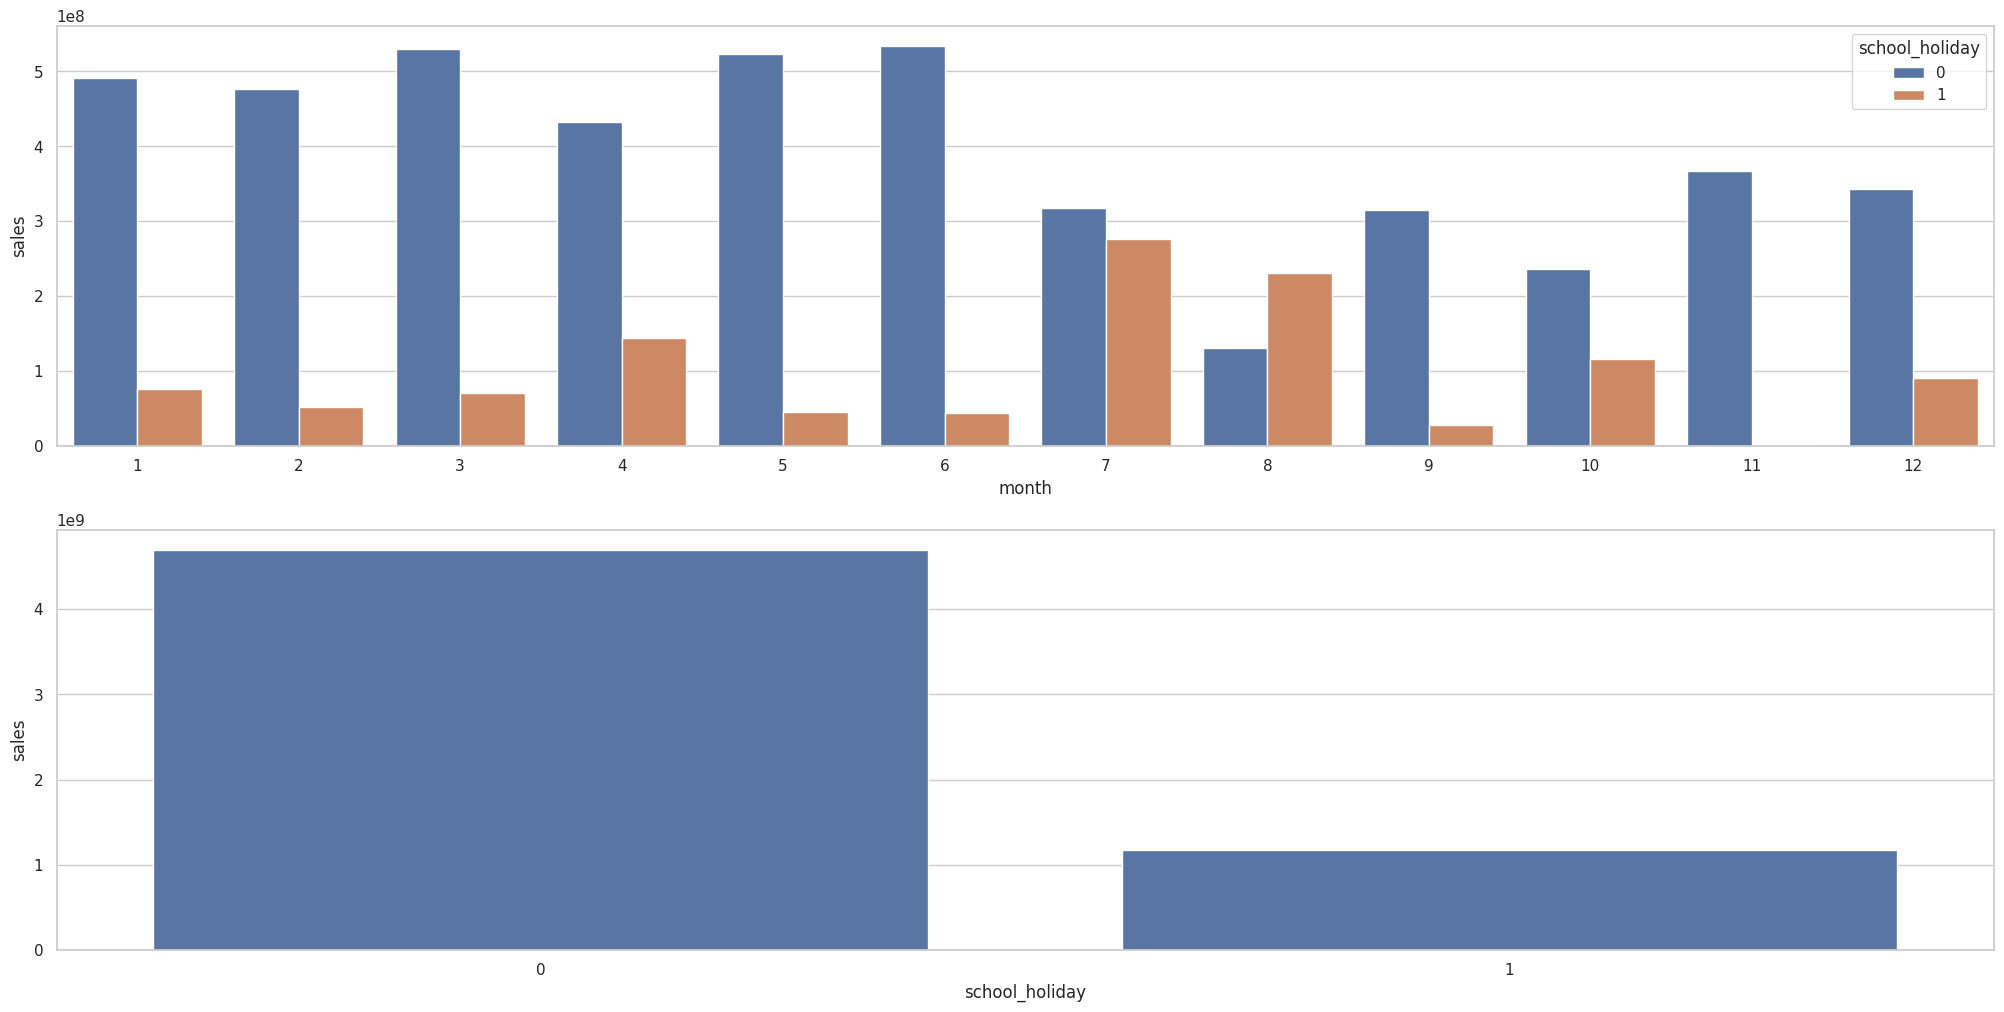

In [37]:
# Agrupa vendas pelo feriado escolar 
aux1 = df4[['school_holiday', 'sales']].groupby('school_holiday').sum().reset_index()

# Cria um painel e coloca o gráfico em uma posição específica dele
plt.subplot(2,1,2)

# Cria um gráfico de barras
sns.barplot(x='school_holiday', y='sales', data=aux1);

# Posiciona um gráfico no painel
plt.subplot(2,1,1)

# Agrupa as vendas pelo mẽs e feriado escolar
aux2 = df4[['month', 'school_holiday', 'sales']].groupby(['month', 'school_holiday']).sum().reset_index()

# Cria um gráfico de barras
sns.barplot(x='month', y='sales', hue= aux2['school_holiday'].astype(str), data=aux2);

## 5.3 RESUMO DAS HIPÓTESES

Após responder a essas perguntas de negócio, criei um quadro para apresentar os resultados de forma mais clara. Nesse quadro, organizei as perguntas por nível de relevância, classificando-as de acordo com o impacto que cada uma tem nos objetivos da empresa. Essa organização ajuda a destacar as questões mais importantes e facilita a tomada de decisões, permitindo que os líderes priorizem as áreas que mais necessitam de atenção. Além disso, o quadro serve como uma ferramenta de consulta rápida para revisitar os principais insights obtidos durante a análise.

In [38]:
tab = [['Hipoteses', 'Conclusão', 'Relevancia'], 
      ['H1', 'Falsa', 'Baixa'],
      ['H2', 'Falsa', 'Meida'],
      ['H3', 'Falsa', 'Media'],
      ['H4', 'Falsa', 'Baixa'],
      ['H5', 'Falsa', 'Baixa'],
      ['H6', 'Falsa', 'Media'],
      ['H7', 'Falsa', 'Alta'],
      ['H8', 'Falsa', 'Alta'],
      ['H9', 'Verdadeira', 'Alta'],
      ['H10', 'Verdadeira', 'Alta'],
      ['H11', 'Verdadeira', 'Baixa']
      ]
print(tabulate(tab,headers= 'firstrow'))

Hipoteses    Conclusão    Relevancia
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Meida
H3           Falsa        Media
H4           Falsa        Baixa
H5           Falsa        Baixa
H6           Falsa        Media
H7           Falsa        Alta
H8           Falsa        Alta
H9           Verdadeira   Alta
H10          Verdadeira   Alta
H11          Verdadeira   Baixa


## 5.4 ANÁLISE MULTIVARIADA

### 5.4.1  VARIÁVEIS NÚMERICAS

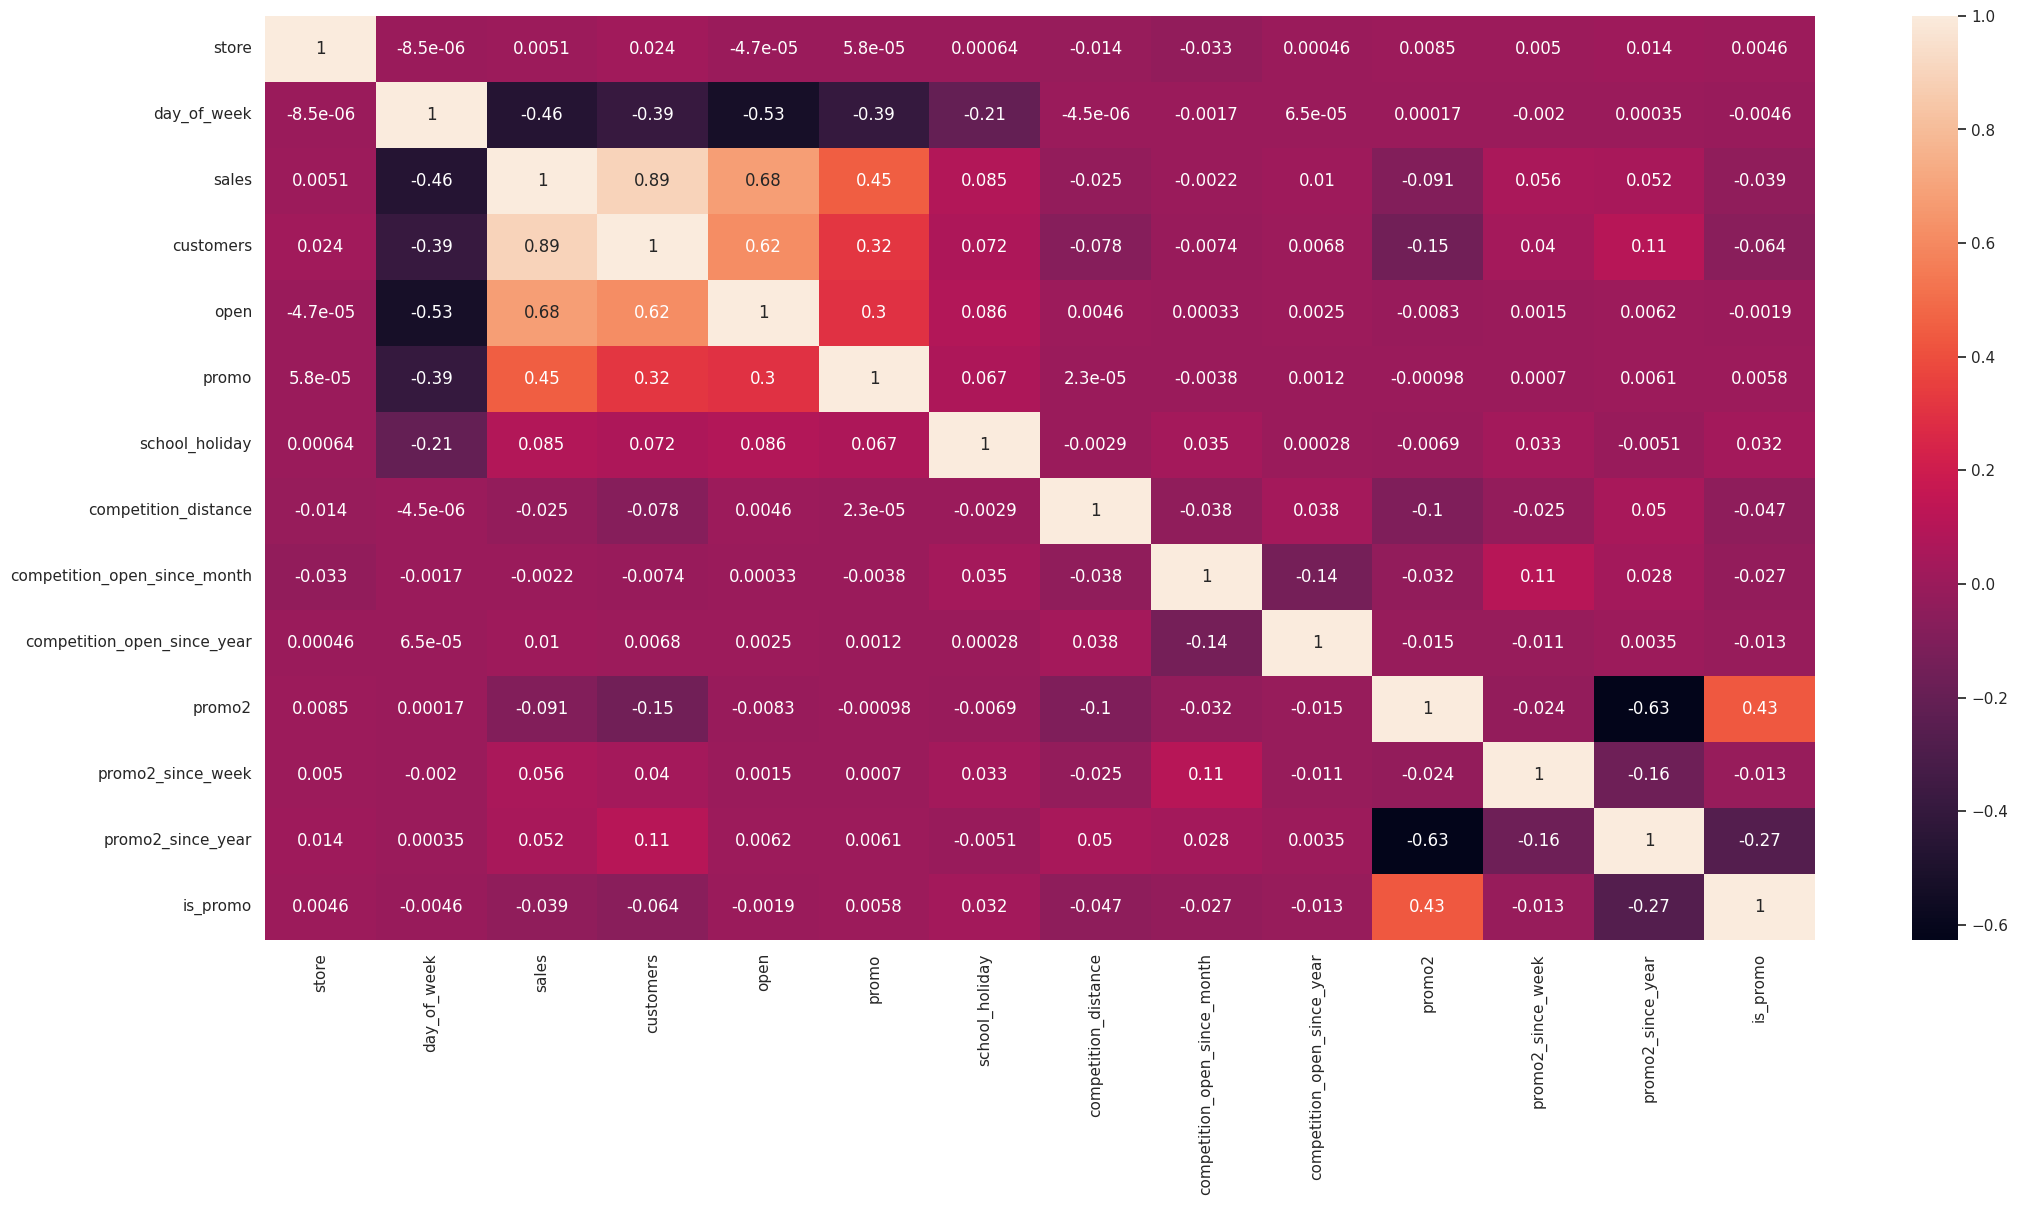

In [39]:
correlation = num_attributes.corr(method = 'pearson')
sns.heatmap(correlation, annot=True);

### 5.4.2 VARIÁVEIS CATEGÓRICAS

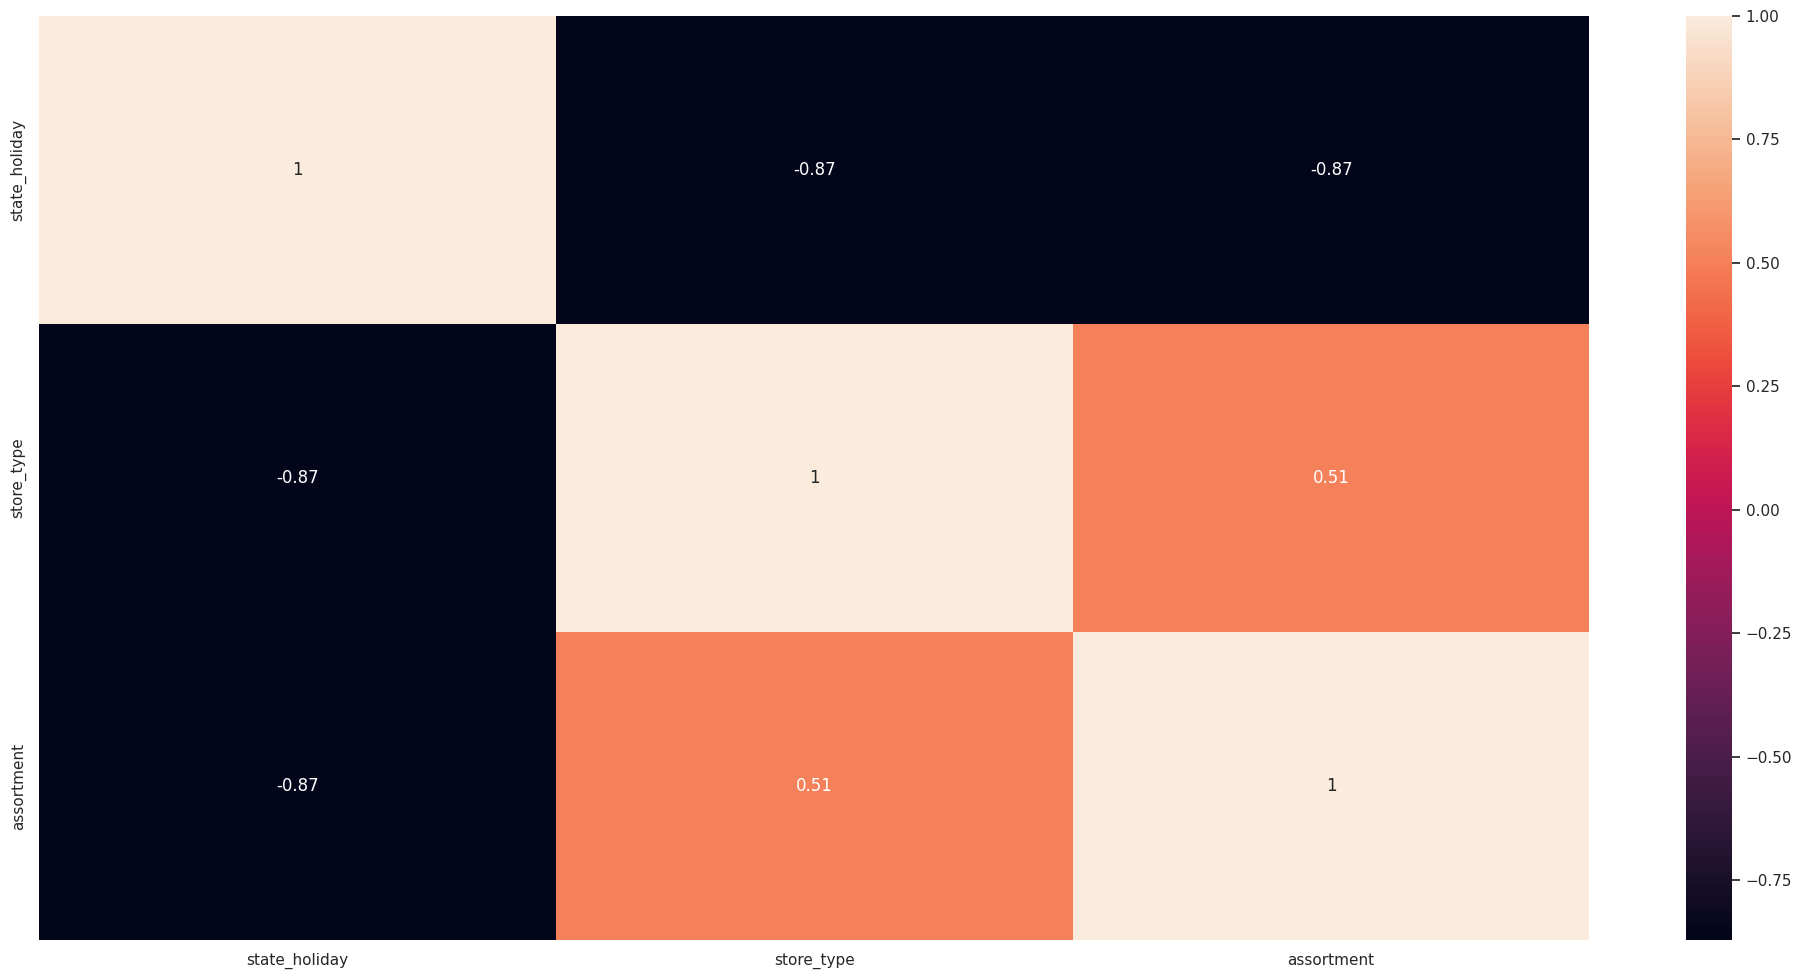

In [40]:
a = df4.select_dtypes(include = 'object')

# Calculate Cramer V 
a1 = cramer_v(a['state_holiday'], a['state_holiday'])
a2 = cramer_v(a['state_holiday'], a['store_type'])
a3 = cramer_v(a['state_holiday'], a['assortment'])

a4 = cramer_v(a['store_type'], a['state_holiday'])
a5 = cramer_v(a['store_type'], a['store_type'])
a6 = cramer_v(a['store_type'], a['assortment'])

a7 = cramer_v(a['assortment'], a['state_holiday'])
a8 = cramer_v(a['assortment'], a['store_type'])
a9 = cramer_v(a['assortment'], a['assortment'])

# Final dataset
d = pd.DataFrame({'state_holiday': [a1, a2, a3],
             'store_type': [a4,a5,a6],
             'assortment': [a7,a8,a9]} )

d = d.set_index(d.columns)

sns.heatmap(d.corr(method = 'pearson'), annot = True);

#  CONSIDERAÇÕES FINAIS 

A Rossmann é uma rede de farmácias alemã com grande presença na Europa, operando milhares de lojas em diversos países. Fundada em 1972, a empresa oferece uma ampla gama de produtos, desde itens de saúde e beleza até artigos de uso diário. A Rossmann é conhecida por suas lojas bem organizadas, preços competitivos e uma linha própria de produtos de alta qualidade. Além disso, a empresa tem investido fortemente em sustentabilidade e responsabilidade social, buscando reduzir seu impacto ambiental e apoiar iniciativas comunitárias. Com uma forte cultura de inovação, a Rossmann continua a expandir sua presença e a diversificar suas ofertas para atender às necessidades de seus clientes.

Neste projeto, foi utilizado um dataset do Kaggle, que contém dados de vendas das lojas da Rossmann. Com base na análise dos dados, foi possível verificar que:

- Lojas com MAIOR sortimentos vendem MENOS.
- Lojas com COMPETIDORES MAIS PERTO vendem MAIS. 
- Lojas com COMPETIDORES a mais tempo vendem MENOS.
- Lojas com promoções ativas por mais tempo vendem MENOS.
- Lojas vendem menos aos finais de semana, principalmente domingo.

É importante ressaltar que a análise não seria possível sem a qualidade e confiabilidade dos dados providos pelo Kaggle. Esse dataset possui diversas informações a serem exploradas, de modo a obter uma compreensão mais completa das vendas. Como exemplo, pode ser realizada a previsão de vendas, utilizando técnicas de modelagem preditiva para estimar as vendas futuras com base em variáveis como datas, promoções, tendências históricas e características das lojas. Isso permitirá otimizar estoques, ajustar estratégias de marketing e melhorar a alocação de recursos, garantindo que a Rossmann esteja bem preparada para atender às demandas dos clientes de maneira eficaz.



<center><img alt="ROSSMANN" width="50%" src="https://www.aswatson.com/wp-content/uploads/2021/06/Rossmann_1.jpg"></center>

---
